In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import pandas as pd
import phase2_common as ph2
from s4bb.spectra import XSpec, CalcSpec_namaster

In [2]:
params_withpbs = np.load('mlsearch/ph2_mlsearch_f1_y20_n3_full_withpbs_diag0_V.npy').T
df_withpbs = pd.DataFrame(params_withpbs, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])

In [3]:
params_colin = np.load('/global/cfs/cdirs/cmbs4/chile_optimization/analysis/cbischoff/phase2/mlsearch/ph2_mlsearch_f1_y20_n3_full_withpbs.npy').T
df_colin = pd.DataFrame(params_colin, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])

bias_colin = df_colin - df_withpbs
bias_colin = bias_colin.drop([64])

summary_stats = pd.DataFrame({
    'Colin': bias_colin.mean().round(4).astype(str) + ' ± ' + bias_colin.std().round(4).astype(str)
})

summary_stats

Colin
status          0.0 ± 0.0
fval     -0.1988 ± 2.7612
r              -0.0 ± 0.0
A_d        -0.021 ± 0.776
alpha_d   0.0002 ± 0.0569
beta_d       0.0 ± 0.0008
A_s      -0.0012 ± 0.0138
alpha_s   0.0035 ± 0.0379
beta_s     0.0003 ± 0.003
epsilon  -0.0001 ± 0.0025
Delta_d     -0.0 ± 0.0001
Delta_s     -0.0 ± 0.0001

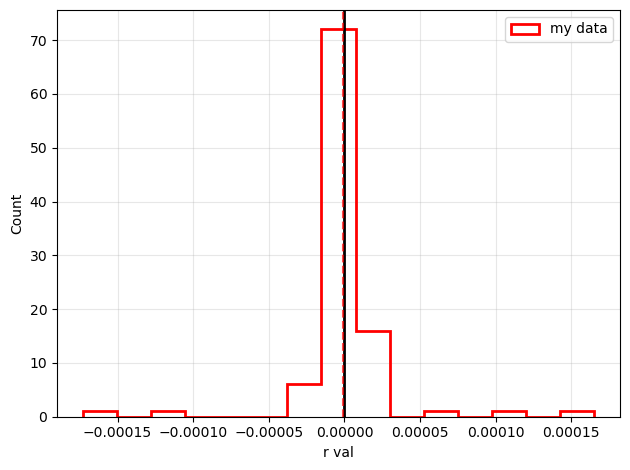

In [4]:
plt.hist(bias_colin['r'], bins=15, color='red', label='my data', histtype='step', linewidth=2)

plt.axvline(0, color='black', linewidth=2)
plt.axvline(bias_colin['r'].mean(), color='red', linestyle='--', alpha=0.7)


plt.xlabel('r val')
plt.ylabel('Count')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [5]:
params_bias25 = np.load('mlsearch/ph2_mlsearch_f1_y20_n3_diag0_full_withpbs_rbias2.5e-03.npy').T
df_rbias25 = pd.DataFrame(params_bias25, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])

params_bias20 = np.load('mlsearch/ph2_mlsearch_f1_y20_n3_diag0_full_withpbs_rbias2e-03.npy').T
df_rbias20 = pd.DataFrame(params_bias20, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])

params_bias15 = np.load('mlsearch/ph2_mlsearch_f1_y20_n3_diag0_full_withpbs_rbias1.5e-03.npy').T
df_rbias15 = pd.DataFrame(params_bias15, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])

bias25 = df_rbias25 - df_withpbs
bias20 = df_rbias20 - df_withpbs
bias15 = df_rbias15 - df_withpbs

summary_stats = pd.DataFrame({
    'r bias 2.5e-03': bias25.mean().round(4).astype(str) + ' ± ' + bias25.std().round(4).astype(str),
    'r bias 2.0e-03': bias20.mean().round(4).astype(str) + ' ± ' + bias20.std().round(4).astype(str),
    'r bias 1.5e-03': bias15.mean().round(4).astype(str) + ' ± ' + bias15.std().round(4).astype(str)
})

summary_stats

r bias 2.5e-03    r bias 2.0e-03    r bias 1.5e-03
status           0.0 ± 0.0         0.0 ± 0.0         0.0 ± 0.0
fval     -19.4786 ± 5.4277  -17.1512 ± 4.634  -14.2621 ± 4.176
r          0.0024 ± 0.0001   0.0019 ± 0.0001   0.0015 ± 0.0001
A_d        0.3193 ± 0.7587   0.3359 ± 0.6783    0.3082 ± 0.665
alpha_d   -0.0224 ± 0.0593  -0.0242 ± 0.0523  -0.0233 ± 0.0506
beta_d     0.0005 ± 0.0019   0.0004 ± 0.0018   0.0005 ± 0.0016
A_s       -0.0015 ± 0.0153  -0.0001 ± 0.0185   0.0001 ± 0.0193
alpha_s    0.0037 ± 0.0475   0.0023 ± 0.0502   0.0028 ± 0.0497
beta_s     -0.001 ± 0.0048  -0.0007 ± 0.0044  -0.0006 ± 0.0042
epsilon   -0.0004 ± 0.0033  -0.0001 ± 0.0022  -0.0003 ± 0.0026
Delta_d       0.0 ± 0.0001     -0.0 ± 0.0001      0.0 ± 0.0001
Delta_s      -0.0 ± 0.0001     -0.0 ± 0.0001     -0.0 ± 0.0001

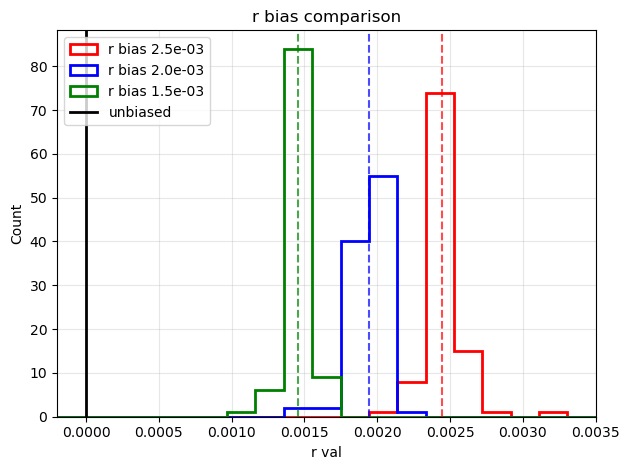

In [6]:
bin_edges = np.linspace(-0.0002, 0.0035, 20)

plt.hist(bias25['r'], bins=bin_edges, color='red', label='r bias 2.5e-03', histtype='step', linewidth=2)
plt.hist(bias20['r'], bins=bin_edges, color='blue', label='r bias 2.0e-03', histtype='step', linewidth=2)
plt.hist(bias15['r'], bins=bin_edges, color='green', label='r bias 1.5e-03', histtype='step', linewidth=2)

plt.axvline(0, color='black', linewidth=2, label='unbiased')
plt.axvline(bias25['r'].mean(), color='red', linestyle='--', alpha=0.7)
plt.axvline(bias20['r'].mean(), color='blue', linestyle='--', alpha=0.7)
plt.axvline(bias15['r'].mean(), color='green', linestyle='--', alpha=0.7)


plt.xlabel('r val')
plt.ylabel('Count')
plt.title('r bias comparison')
plt.legend()
plt.grid(alpha=0.3)
plt.xlim(-0.0002, 0.0035)
plt.tight_layout()
plt.show()

In [7]:
bands = ['HF-2', 'HF-1', 'MF-2', 'MF-1', 'LF-2', 'LF-1']
bias_values = ['+2pct', '-2pct']
columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s']

df_dict_withpbs = {}
bias_dict_withpbs = {}

for band in bands:
    for bias in bias_values:
        band_clean = band.replace('-', '')
        if bias == '+2pct':
            bias_clean = '2_'
        else:
            bias_clean = 'neg2_'
        
        var_name = f"{band_clean}_{bias_clean}withpbs"
        filename = f'mlsearch_bandpass_v2/ph2_mlsearch_f1_y20_n3_diag0_full_withpbs_{band}_{bias}.npy'
        params = np.load(filename).T
        df_dict_withpbs[var_name] = pd.DataFrame(params, columns=columns)
        bias_dict_withpbs[f"bias{var_name}"] = df_dict_withpbs[var_name] - df_withpbs

summary_data_withpbs = {}
for band in bands:
    for bias in bias_values:
        band_clean = band.replace('-', '')
        if bias == '+2pct':
            bias_clean = '2_'
        else:
            bias_clean = 'neg2_'
        
        var_name = f"{band_clean}_{bias_clean}withpbs"
        bias_var = f"bias{var_name}"
        label = f"{band} {bias.replace('pct', '%')}"
        summary_data_withpbs[label] = (bias_dict_withpbs[bias_var].mean().round(4).astype(str) + 
                                      ' ± ' + 
                                      bias_dict_withpbs[bias_var].std().round(4).astype(str))

summary_stats_withpbs = pd.DataFrame(summary_data_withpbs)
summary_stats_withpbs

HF-2 +2%            HF-2 -2%            HF-1 +2%  \
status            0.0 ± 0.0           0.0 ± 0.0           0.0 ± 0.0   
fval     504.6328 ± 45.3318  591.7886 ± 48.6537  792.7484 ± 60.0959   
r           0.0005 ± 0.0002     0.0013 ± 0.0002     0.0002 ± 0.0001   
A_d         -1.8441 ± 1.086      2.9983 ± 1.683     -0.5235 ± 0.553   
alpha_d    -0.0385 ± 0.0841    -0.0098 ± 0.1029    -0.0244 ± 0.0468   
beta_d     -0.1298 ± 0.0027     0.1445 ± 0.0038     -0.0081 ± 0.002   
A_s         0.0029 ± 0.0183    -0.0199 ± 0.0282    -0.0235 ± 0.0188   
alpha_s     0.0015 ± 0.0408      0.0215 ± 0.062     0.0286 ± 0.0506   
beta_s     -0.0023 ± 0.0037     -0.0022 ± 0.005    -0.0034 ± 0.0031   
epsilon    -0.0077 ± 0.0038     0.0047 ± 0.0046    -0.0089 ± 0.0032   
Delta_d    -0.0002 ± 0.0002     0.0006 ± 0.0001     0.0002 ± 0.0001   
Delta_s    -0.0002 ± 0.0001     0.0001 ± 0.0001     0.0001 ± 0.0001   

                   HF-1 -2%            MF-2 +2%           MF-2 -2%  \
status            0.0 ± 0.0           0.0 ± 0.0         0.02 ± 0.2   
fval     737.0068 ± 56.1459  249.9576 ± 29.7689  255.2041 ± 29.985   
r          -0.0001 ± 0.0001     0.0009 ± 0.0002    0.0002 ± 0.0002   
A_d        -0.1007 ± 0.7535     0.7181 ± 1.0109   -0.5256 ± 0.5528   
alpha_d     0.0486 ± 0.0558    -0.0108 ± 0.0714    0.0015 ± 0.0425   
beta_d     -0.0019 ± 0.0015      0.0912 ± 0.003   -0.0741 ± 0.0026   
A_s         0.0135 ± 0.0184    -0.0006 ± 0.0217   -0.0119 ± 0.0169   
alpha_s     -0.0107 ± 0.044     0.0024 ± 0.0568    0.0157 ± 0.0452   
beta_s      0.0014 ± 0.0027     0.0039 ± 0.0046    0.0024 ± 0.0035   
epsilon      0.0111 ± 0.003     0.0253 ± 0.0059   -0.0233 ± 0.0046   
Delta_d    -0.0004 ± 0.0001     0.0004 ± 0.0001   -0.0001 ± 0.0001   
Delta_s       -0.0 ± 0.0001    -0.0003 ± 0.0002   -0.0006 ± 0.0002   

                  MF-1 +2%           MF-1 -2%           LF-2 +2%  \
status           0.0 ± 0.0          0.0 ± 0.0          0.0 ± 0.0   
fval     41.0566 ± 12.0091  46.2454 ± 11.9904  51.8198 ± 14.0188   
r          0.0001 ± 0.0001    0.0003 ± 0.0001      -0.0 ± 0.0001   
A_d       -0.0829 ± 0.7739    0.1279 ± 0.7511   -0.1021 ± 0.7647   
alpha_d    0.0104 ± 0.0565   -0.0151 ± 0.0557    0.0075 ± 0.0619   
beta_d     0.0005 ± 0.0018    0.0025 ± 0.0015    0.0001 ± 0.0015   
A_s       -0.0089 ± 0.0185    0.0071 ± 0.0193    0.0147 ± 0.0241   
alpha_s   -0.0025 ± 0.0457    0.0092 ± 0.0501    0.0057 ± 0.0638   
beta_s     0.0206 ± 0.0052   -0.0229 ± 0.0033    0.0817 ± 0.0165   
epsilon    -0.006 ± 0.0032    0.0106 ± 0.0032      -0.0 ± 0.0039   
Delta_d   -0.0001 ± 0.0001    0.0002 ± 0.0001      -0.0 ± 0.0001   
Delta_s       0.0 ± 0.0001   -0.0001 ± 0.0001   -0.0005 ± 0.0005   

                  LF-2 -2%          LF-1 +2%          LF-1 -2%  
status           0.0 ± 0.0         0.0 ± 0.0         0.0 ± 0.0  
fval     46.4228 ± 11.0085  25.5015 ± 9.0951  26.4152 ± 8.3983  
r          0.0004 ± 0.0001   0.0002 ± 0.0001     -0.0 ± 0.0001  
A_d       -0.0323 ± 0.8209    0.016 ± 0.8013  -0.0541 ± 0.7855  
alpha_d   -0.0008 ± 0.0596  -0.0031 ± 0.0602   0.0015 ± 0.0589  
beta_d     0.0005 ± 0.0012   0.0003 ± 0.0015   0.0003 ± 0.0015  
A_s       -0.0137 ± 0.0225   0.1342 ± 0.0267  -0.1135 ± 0.0298  
alpha_s   -0.0086 ± 0.0509  -0.0056 ± 0.0487     0.01 ± 0.0537  
beta_s    -0.1191 ± 0.0057  -0.1322 ± 0.0117   0.1136 ± 0.0044  
epsilon    0.0008 ± 0.0032    0.0004 ± 0.003  -0.0005 ± 0.0033  
Delta_d    0.0001 ± 0.0001      0.0 ± 0.0001     -0.0 ± 0.0001  
Delta_s    0.0003 ± 0.0001   0.0002 ± 0.0002  -0.0002 ± 0.0001

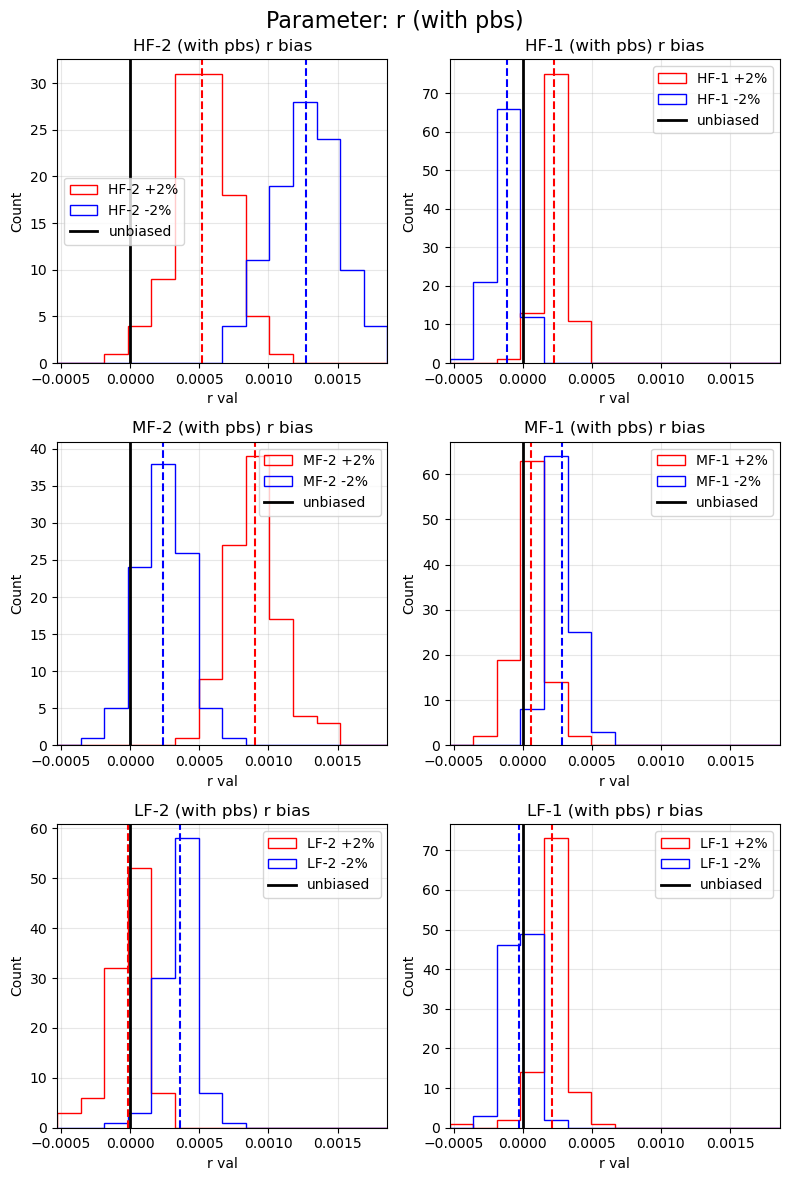

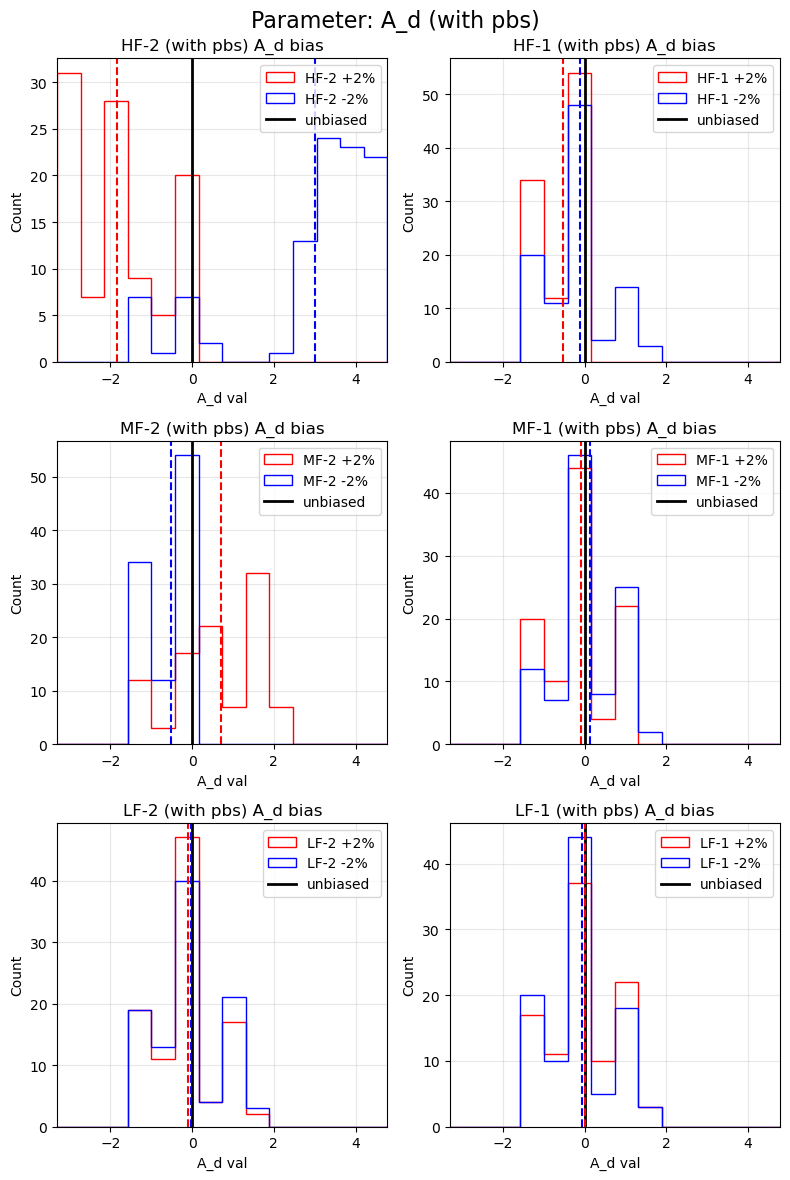

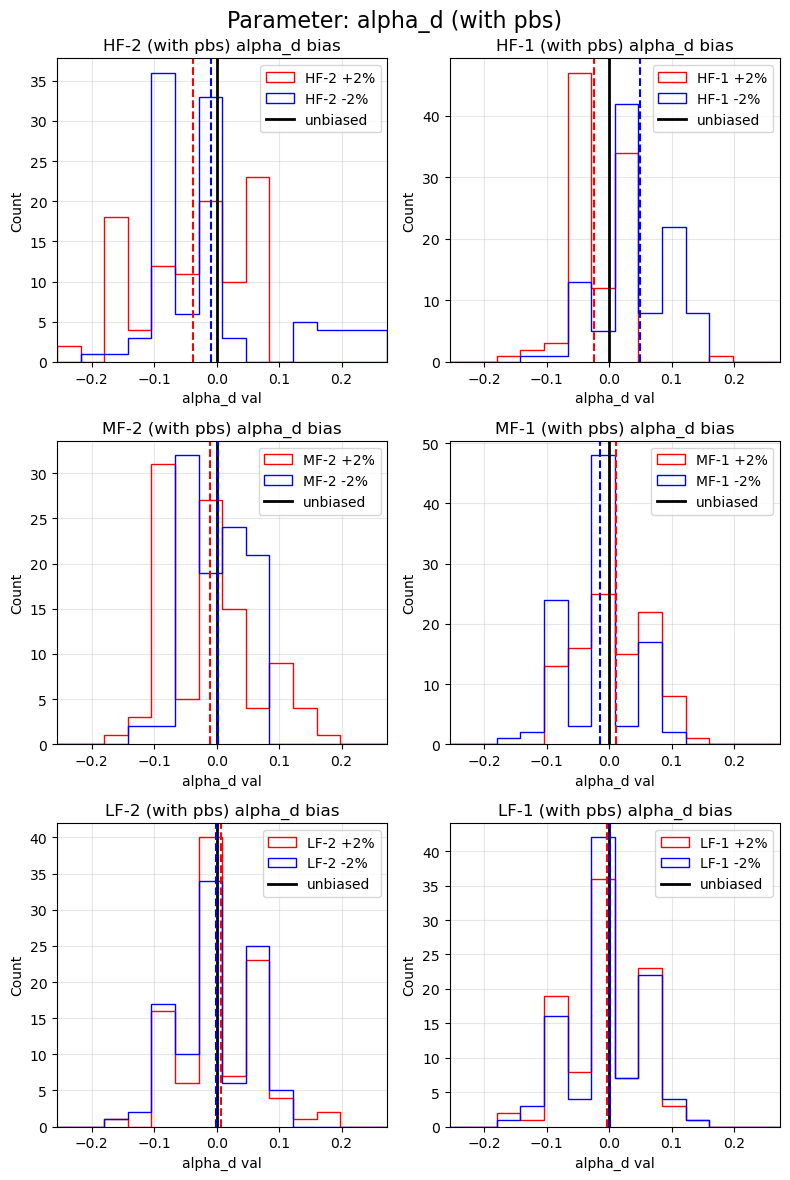

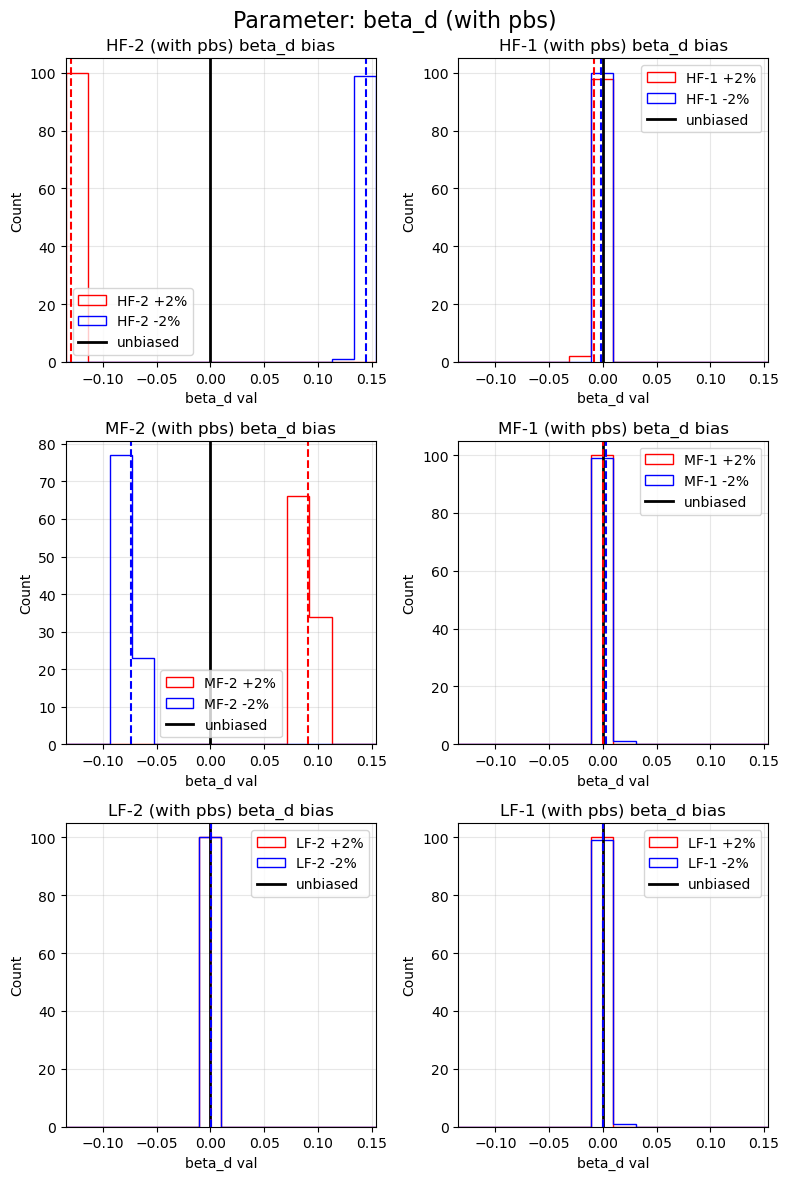

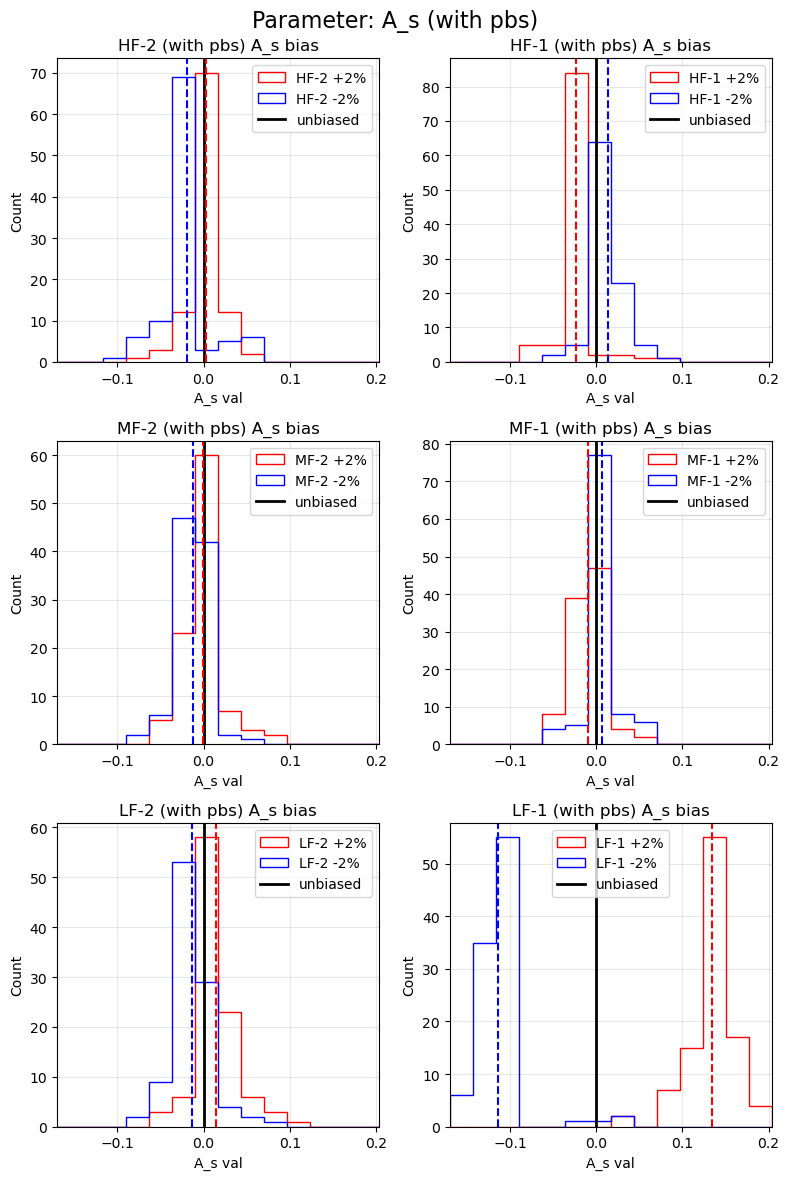

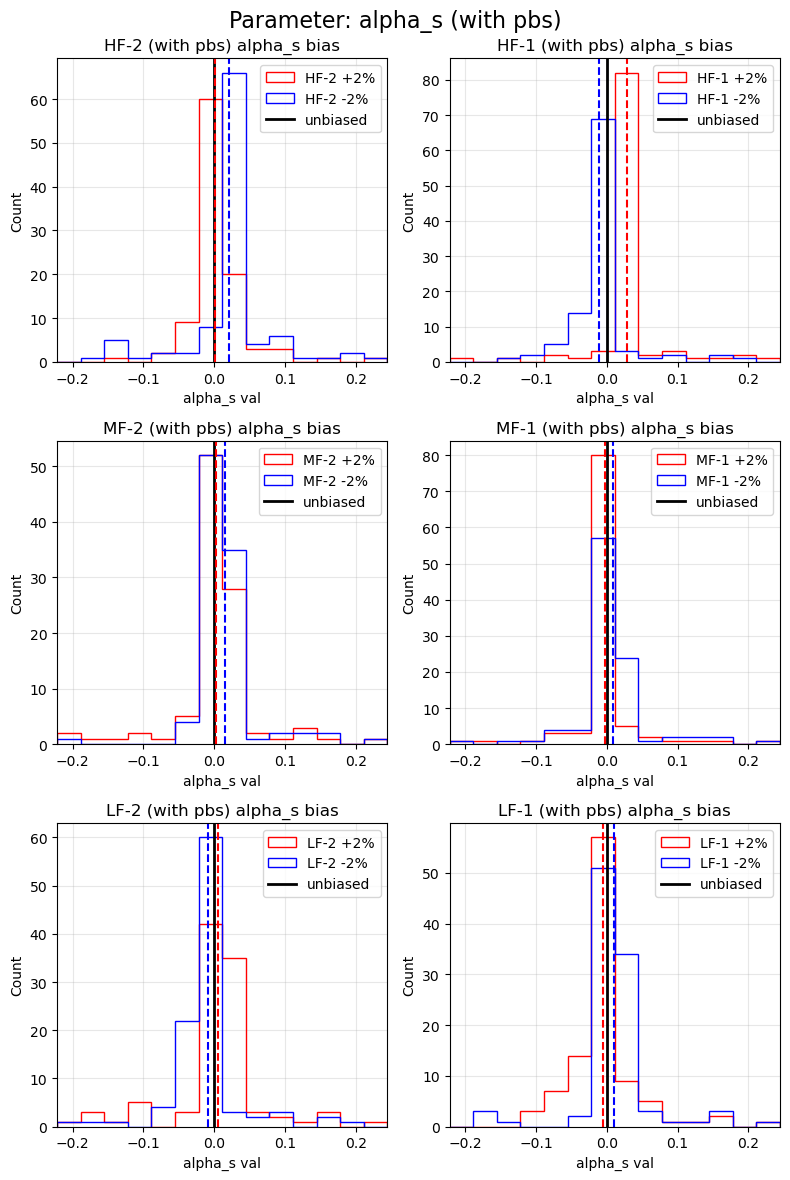

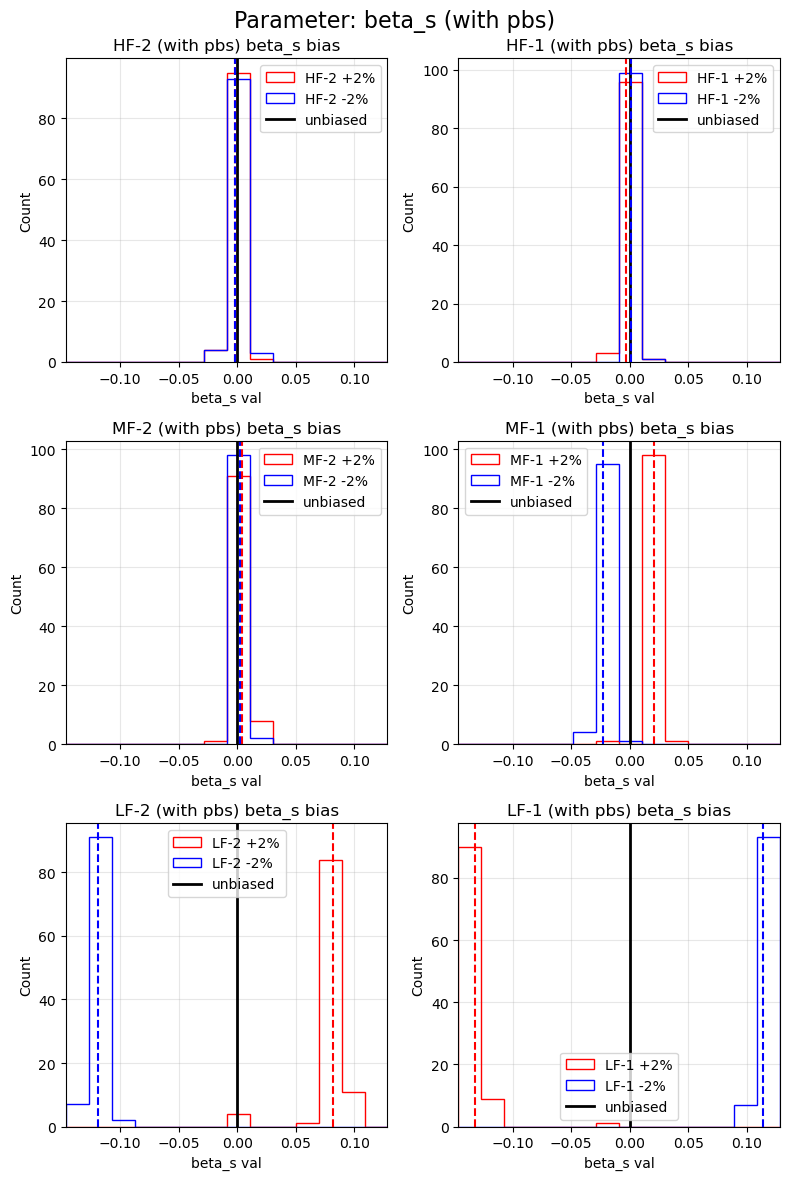

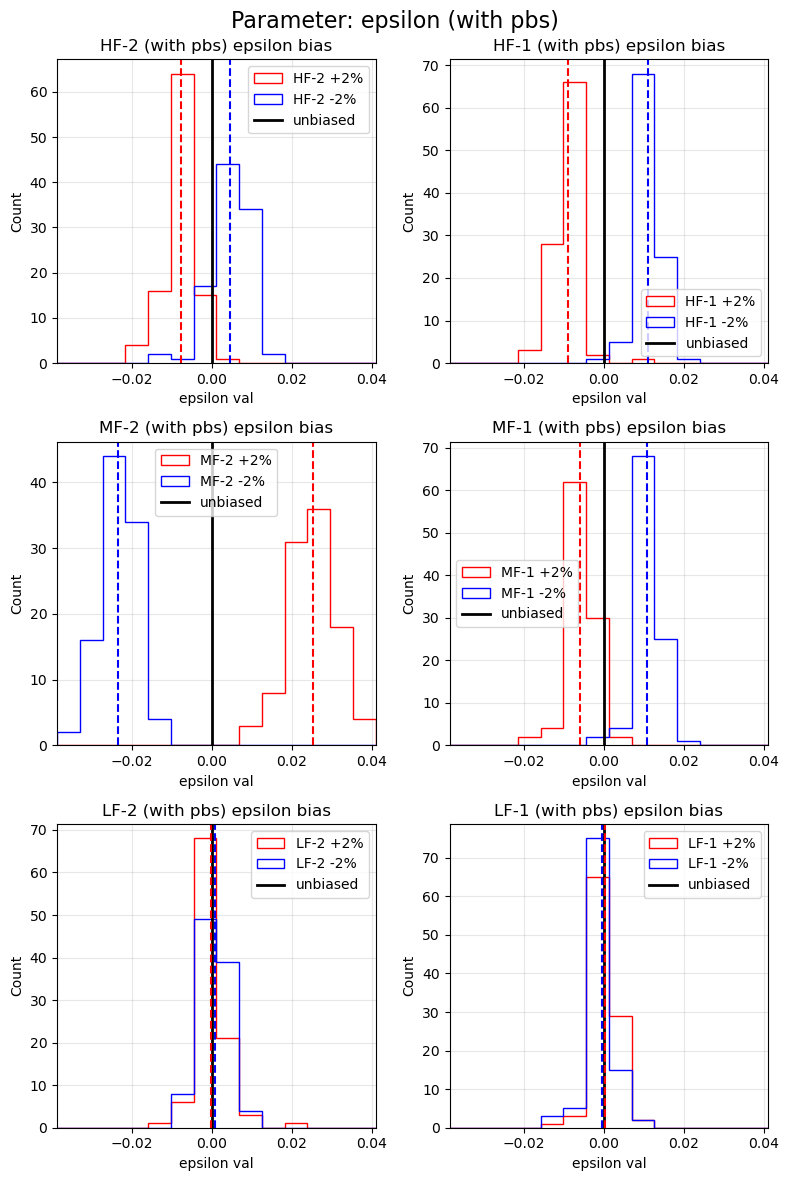

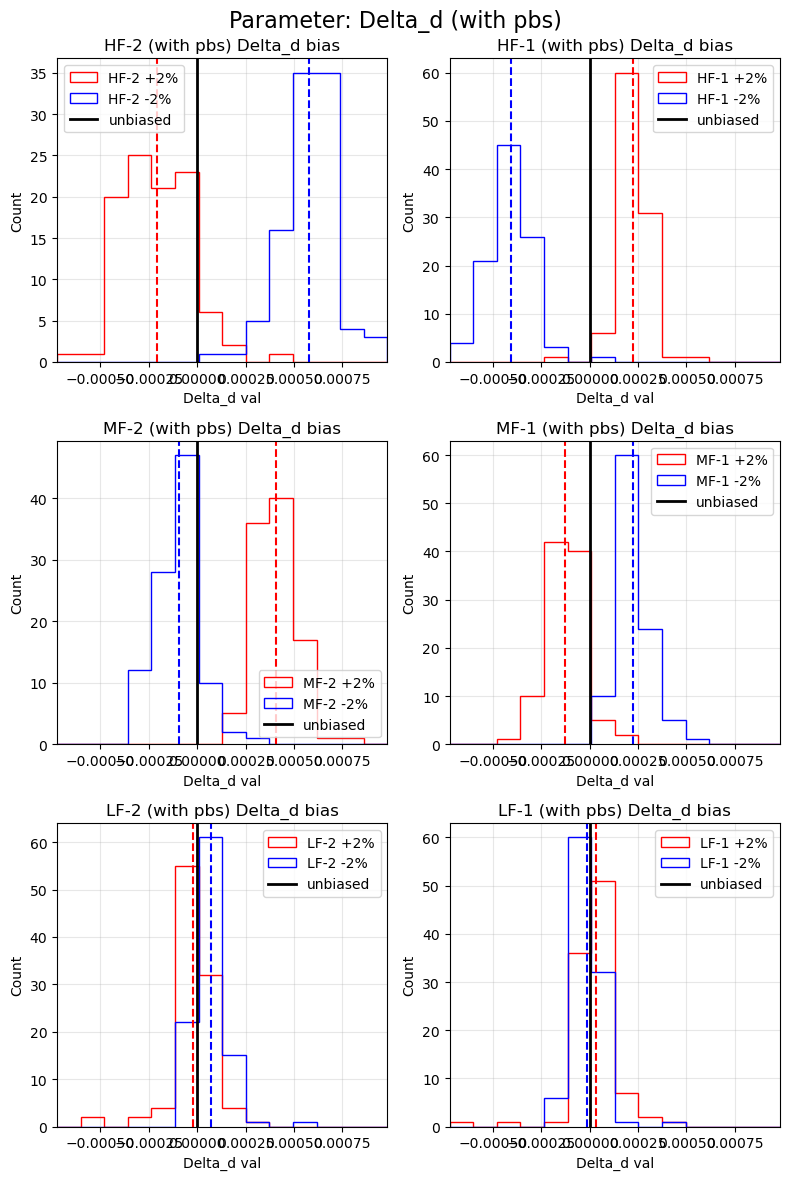

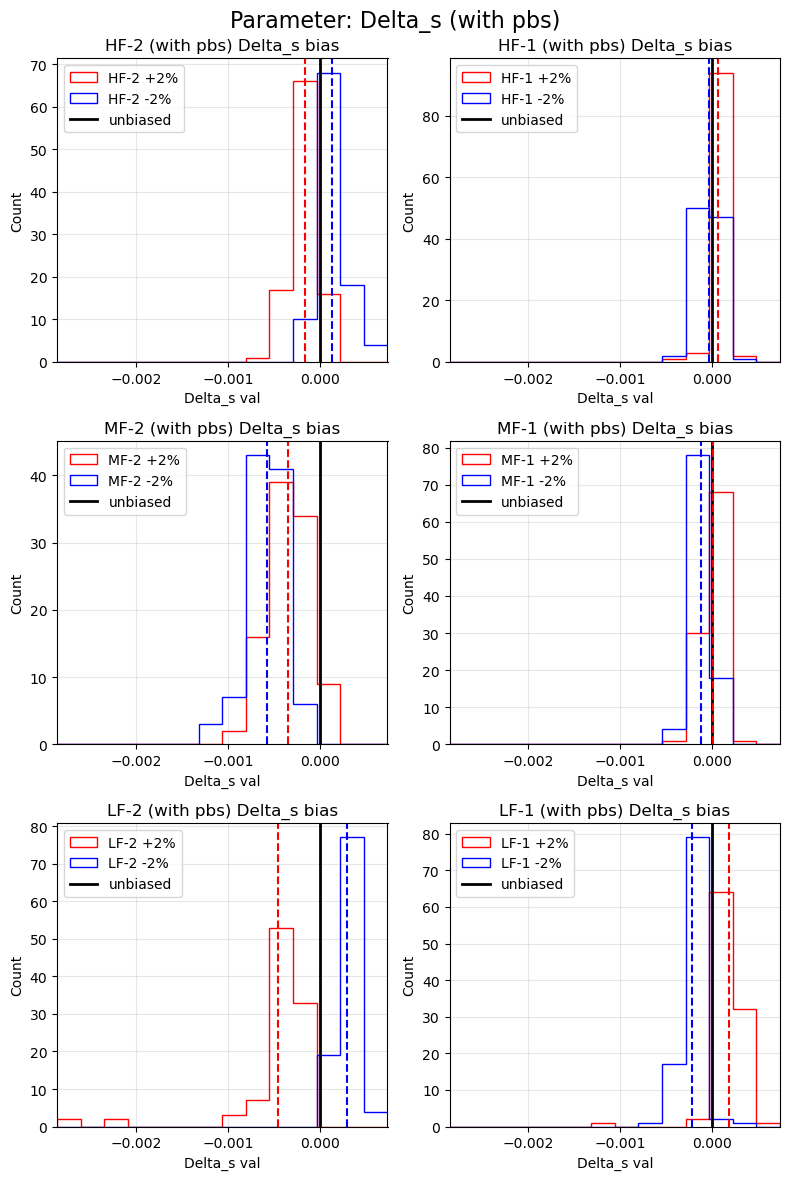

In [8]:
parameters = ['r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s']

bands_data_withpbs = []
for band in ['HF-2', 'HF-1', 'MF-2', 'MF-1', 'LF-2', 'LF-1']:
    band_clean = band.replace('-', '')
    pos_var = f"bias{band_clean}_2_withpbs"  
    neg_var = f"bias{band_clean}_neg2_withpbs" 
    bands_data_withpbs.append((bias_dict_withpbs[pos_var], bias_dict_withpbs[neg_var], band))

for param in parameters:
    all_param_data = []
    for pos_data, neg_data, _ in bands_data_withpbs:
        all_param_data.extend(pos_data[param])
        all_param_data.extend(neg_data[param])
    
    param_min = min(all_param_data)
    param_max = max(all_param_data)
    bin_edges = np.linspace(param_min, param_max, 15)
    
    fig, axes = plt.subplots(3, 2, figsize=(8, 12))
    axes = axes.flatten()
    
    for i, (pos_data, neg_data, band_name) in enumerate(bands_data_withpbs):
        ax = axes[i]
        
        ax.hist(pos_data[param], bins=bin_edges, color='red', label=f'{band_name} +2%', histtype='step')
        ax.hist(neg_data[param], bins=bin_edges, color='blue', label=f'{band_name} -2%', histtype='step')
        
        ax.axvline(0, color='black', linewidth=2, label='unbiased')
        ax.axvline(pos_data[param].mean(), color='red', linestyle='--')
        ax.axvline(neg_data[param].mean(), color='blue', linestyle='--')
        
        ax.set_xlabel(f'{param} val')
        ax.set_ylabel('Count')
        ax.set_title(f'{band_name} (with pbs) {param} bias')
        ax.set_xlim(param_min, param_max)
        ax.legend()
        ax.grid(alpha=0.3)
    
    plt.suptitle(f'Parameter: {param} (with pbs)', fontsize=16)
    plt.tight_layout()
    plt.show()

In [9]:
params_nopbs = np.load('mlsearch/ph2_mlsearch_f1_y20_n3_full_nopbs_diag0_V.npy').T
df_nopbs = pd.DataFrame(params_nopbs, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])

bands = ['HF-2', 'HF-1', 'MF-2', 'MF-1', 'LF-2', 'LF-1']
bias_values = ['+2pct', '-2pct']
columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s']

df_dict_nopbs = {}
bias_dict_nopbs = {}

for band in bands:
    for bias in bias_values:
        band_clean = band.replace('-', '')
        if bias == '+2pct':
            bias_clean = '2_'
        else:
            bias_clean = 'neg2_'
        
        var_name = f"{band_clean}_{bias_clean}nopbs" 
        filename = f'mlsearch_bandpass_v2/ph2_mlsearch_f1_y20_n3_diag0_full_nopbs_{band}_{bias}.npy'
        params = np.load(filename).T
        df_dict_nopbs[var_name] = pd.DataFrame(params, columns=columns)
        bias_dict_nopbs[f"bias{var_name}"] = df_dict_nopbs[var_name] - df_nopbs

summary_data_nopbs = {}
for band in bands:
    for bias in bias_values:
        band_clean = band.replace('-', '')
        if bias == '+2pct':
            bias_clean = '2_'
        else:
            bias_clean = 'neg2_'
        
        var_name = f"{band_clean}_{bias_clean}nopbs"
        bias_var = f"bias{var_name}"
        label = f"{band} {bias.replace('pct', '%')}"
        summary_data_nopbs[label] = (bias_dict_nopbs[bias_var].mean().round(4).astype(str) + 
                                    ' ± ' + 
                                    bias_dict_nopbs[bias_var].std().round(4).astype(str))

summary_stats_nopbs = pd.DataFrame(summary_data_nopbs)
summary_stats_nopbs

HF-2 +2%           HF-2 -2%             HF-1 +2%  \
status       -0.04 ± 0.2814     -0.04 ± 0.2814       -0.04 ± 0.2814   
fval     743.3887 ± 61.6204  876.574 ± 66.1569  1269.9412 ± 79.3485   
r           0.0008 ± 0.0003    0.0011 ± 0.0002        -0.0 ± 0.0001   
A_d        -0.3312 ± 0.6497    2.4357 ± 2.2902     -0.0019 ± 0.0151   
alpha_d    -0.1292 ± 0.0554    0.0007 ± 0.1365     -0.0935 ± 0.0225   
beta_d     -0.1298 ± 0.0031    0.1342 ± 0.0032     -0.0395 ± 0.0032   
A_s         0.0184 ± 0.0526   -0.0464 ± 0.0686     -0.0393 ± 0.0445   
alpha_s    -0.0142 ± 0.0776    0.0593 ± 0.1065      0.0444 ± 0.0767   
beta_s     -0.0026 ± 0.0057   -0.0041 ± 0.0057     -0.0043 ± 0.0047   
epsilon     0.0038 ± 0.0056    0.0001 ± 0.0071     -0.0218 ± 0.0048   
Delta_d    -0.0001 ± 0.0001    0.0003 ± 0.0001      0.0001 ± 0.0001   
Delta_s     0.0001 ± 0.0001    0.0001 ± 0.0001     -0.0001 ± 0.0001   

                    HF-1 -2%            MF-2 +2%           MF-2 -2%  \
status        -0.04 ± 0.2814      -0.04 ± 0.2814     -0.04 ± 0.2814   
fval     1243.4309 ± 76.8587  432.5321 ± 38.3461  479.428 ± 42.5697   
r           -0.0001 ± 0.0001     0.0015 ± 0.0002    0.0011 ± 0.0003   
A_d         -0.0101 ± 0.0124     0.0102 ± 0.0169   -0.0253 ± 0.0102   
alpha_d      0.0743 ± 0.0118     0.0603 ± 0.0106   -0.0527 ± 0.0138   
beta_d       0.0224 ± 0.0039     0.1309 ± 0.0033    -0.1084 ± 0.003   
A_s          0.0427 ± 0.0364     0.0103 ± 0.0411    -0.034 ± 0.0352   
alpha_s     -0.0469 ± 0.0667    -0.0055 ± 0.0679    0.0449 ± 0.0625   
beta_s       0.0032 ± 0.0049      0.0028 ± 0.005    0.0024 ± 0.0046   
epsilon      0.0265 ± 0.0064     0.0325 ± 0.0053    -0.0304 ± 0.004   
Delta_d     -0.0004 ± 0.0002     0.0004 ± 0.0001   -0.0001 ± 0.0001   
Delta_s         0.0 ± 0.0001    -0.0002 ± 0.0002   -0.0005 ± 0.0002   

                  MF-1 +2%           MF-1 -2%           LF-2 +2%  \
status      -0.04 ± 0.2814     -0.04 ± 0.2814     -0.04 ± 0.2814   
fval     73.0021 ± 18.0041  80.7576 ± 16.5799  96.4916 ± 19.8928   
r          0.0002 ± 0.0001    0.0004 ± 0.0001    0.0001 ± 0.0001   
A_d        -0.004 ± 0.0113    0.0076 ± 0.0737   -0.0019 ± 0.0152   
alpha_d    0.0015 ± 0.0192    0.0014 ± 0.0191    0.0039 ± 0.0235   
beta_d    -0.0112 ± 0.0023    0.0147 ± 0.0019    0.0005 ± 0.0021   
A_s        -0.0139 ± 0.031    0.0018 ± 0.0372    0.0002 ± 0.0412   
alpha_s    0.0067 ± 0.0611    0.0099 ± 0.0704    0.0108 ± 0.0789   
beta_s      0.019 ± 0.0046   -0.0227 ± 0.0045     0.0887 ± 0.017   
epsilon   -0.0086 ± 0.0031    0.0154 ± 0.0043    0.0039 ± 0.0033   
Delta_d   -0.0001 ± 0.0001    0.0002 ± 0.0001       0.0 ± 0.0001   
Delta_s       0.0 ± 0.0001   -0.0001 ± 0.0001   -0.0004 ± 0.0005   

                  LF-2 -2%           LF-1 +2%           LF-1 -2%  
status      -0.04 ± 0.2814     -0.04 ± 0.2814     -0.04 ± 0.2814  
fval     81.2646 ± 16.4144  43.5678 ± 13.7971  53.0993 ± 20.1208  
r          0.0005 ± 0.0001    0.0003 ± 0.0001       0.0 ± 0.0001  
A_d       -0.0045 ± 0.0176   -0.0154 ± 0.0157   -0.0024 ± 0.0141  
alpha_d   -0.0006 ± 0.0142    0.0003 ± 0.0151    0.0033 ± 0.0235  
beta_d       0.001 ± 0.002    0.0006 ± 0.0021    0.0007 ± 0.0027  
A_s        0.0245 ± 0.0434      0.16 ± 0.0403   -0.1135 ± 0.0619  
alpha_s   -0.0422 ± 0.0652   -0.0323 ± 0.0562     0.0038 ± 0.085  
beta_s    -0.1299 ± 0.0107   -0.1404 ± 0.0136    0.1136 ± 0.0234  
epsilon   -0.0015 ± 0.0041   -0.0018 ± 0.0029    0.0027 ± 0.0042  
Delta_d    0.0001 ± 0.0001    0.0001 ± 0.0001       0.0 ± 0.0001  
Delta_s    0.0002 ± 0.0002    0.0001 ± 0.0003   -0.0003 ± 0.0004

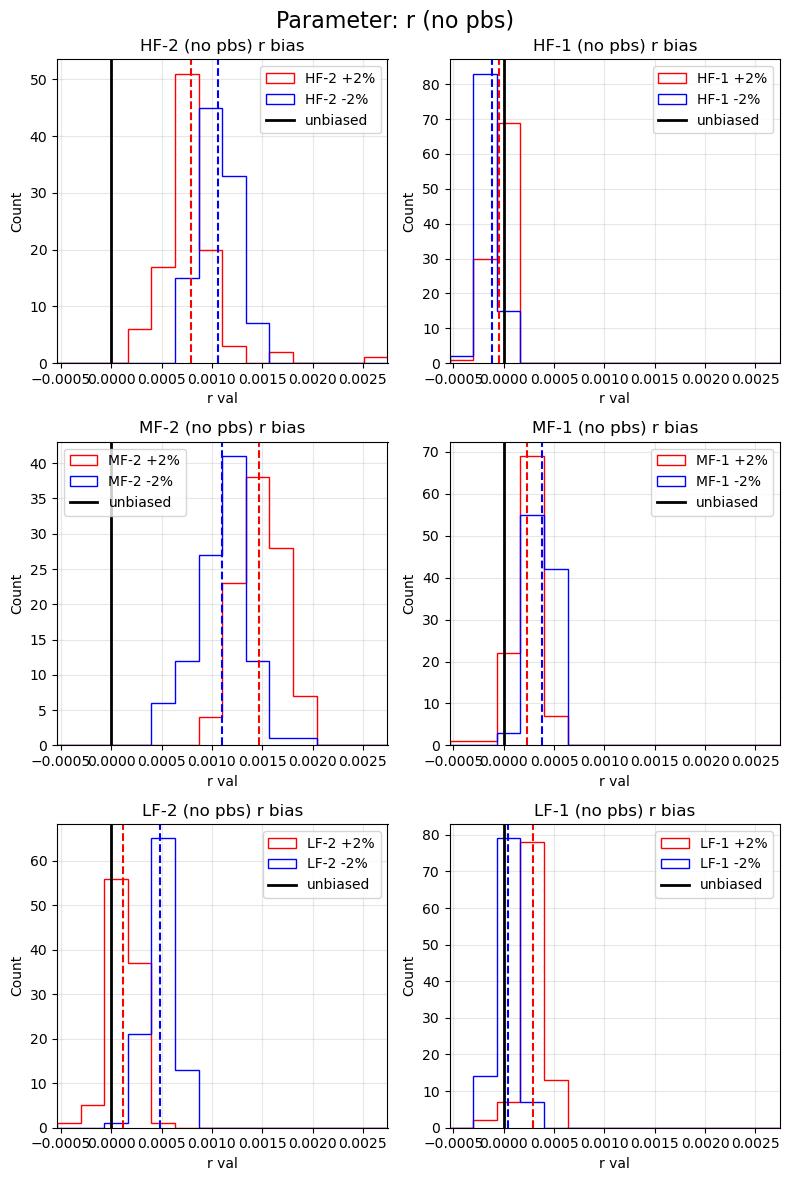

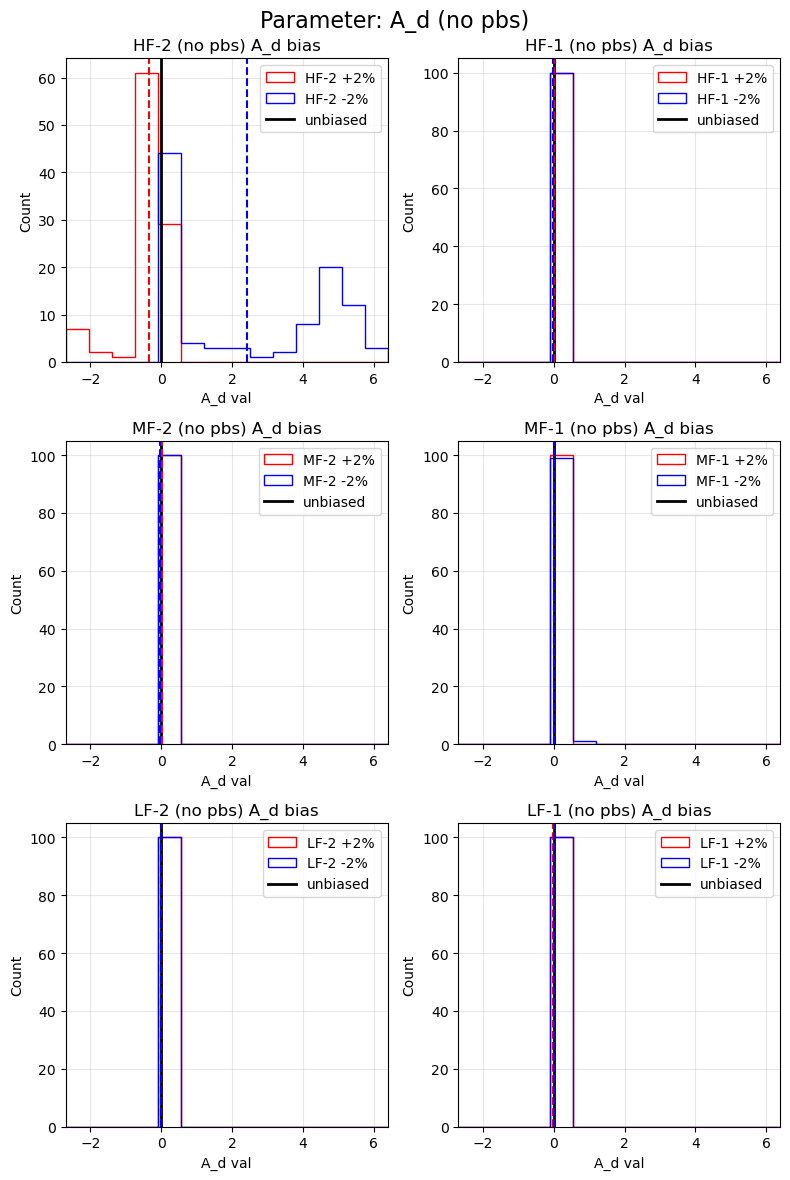

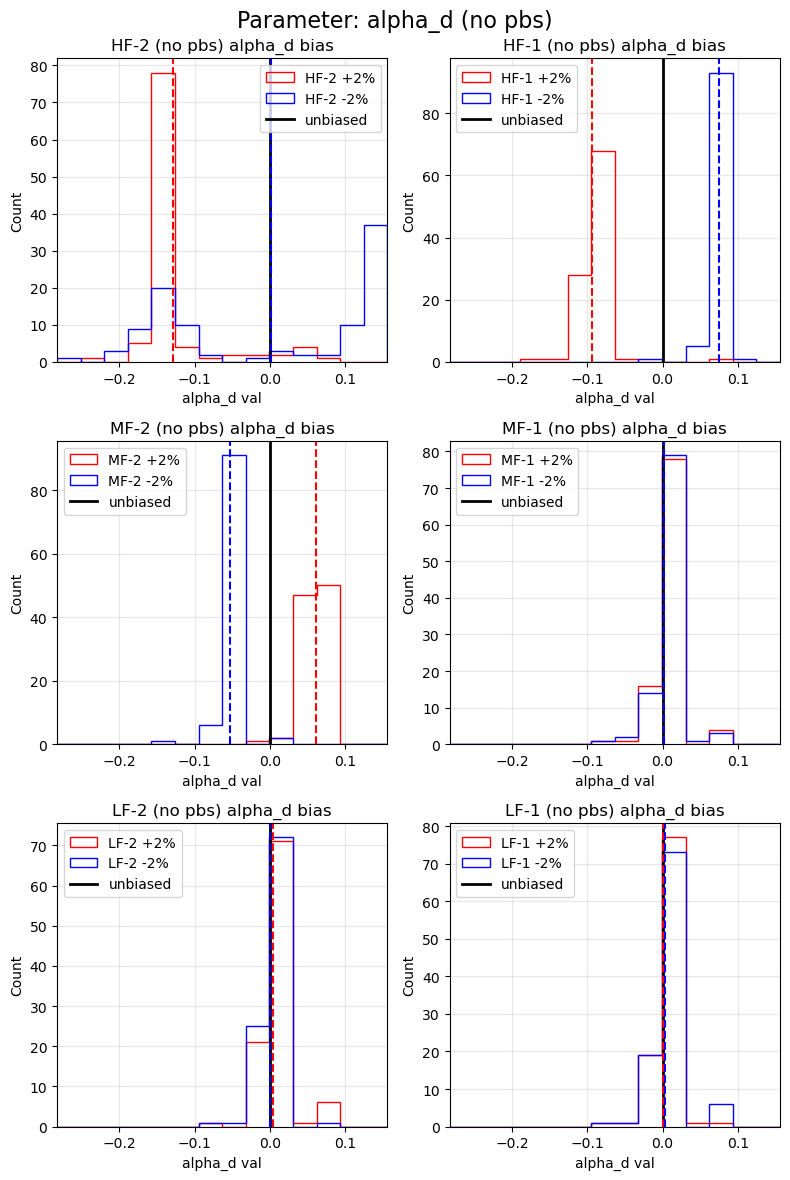

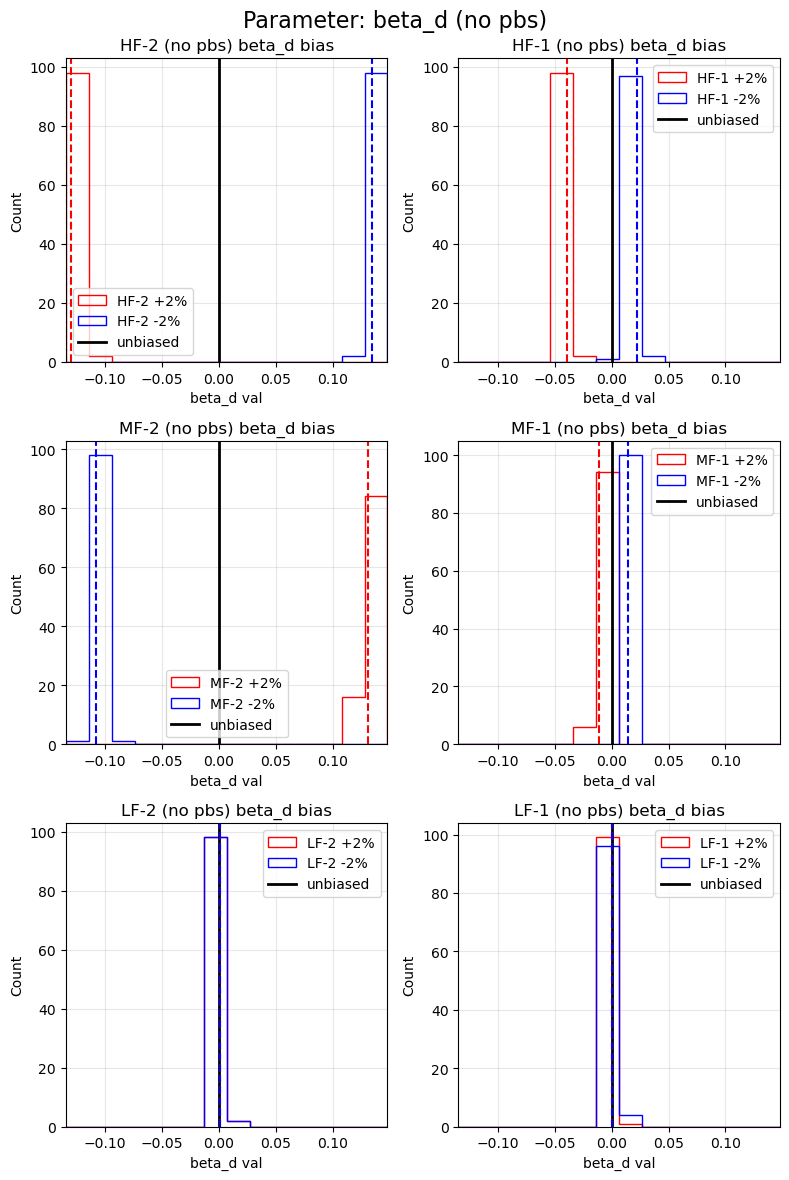

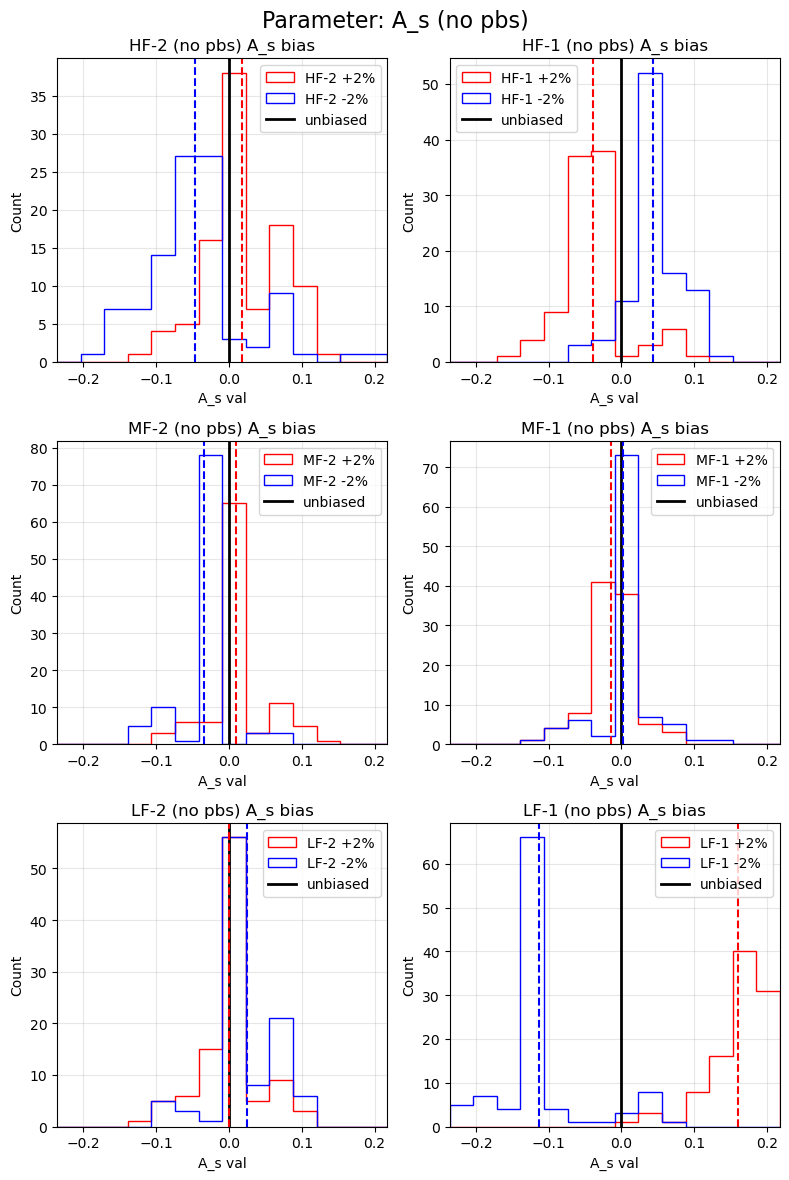

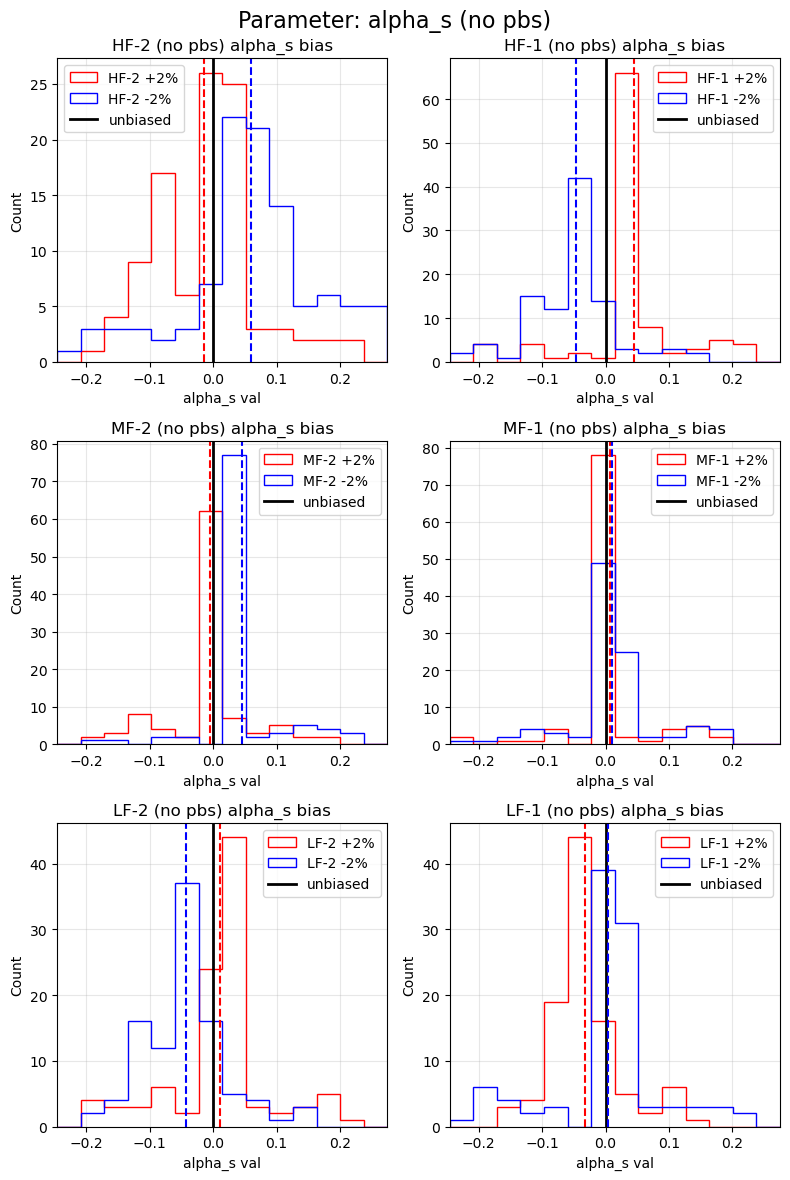

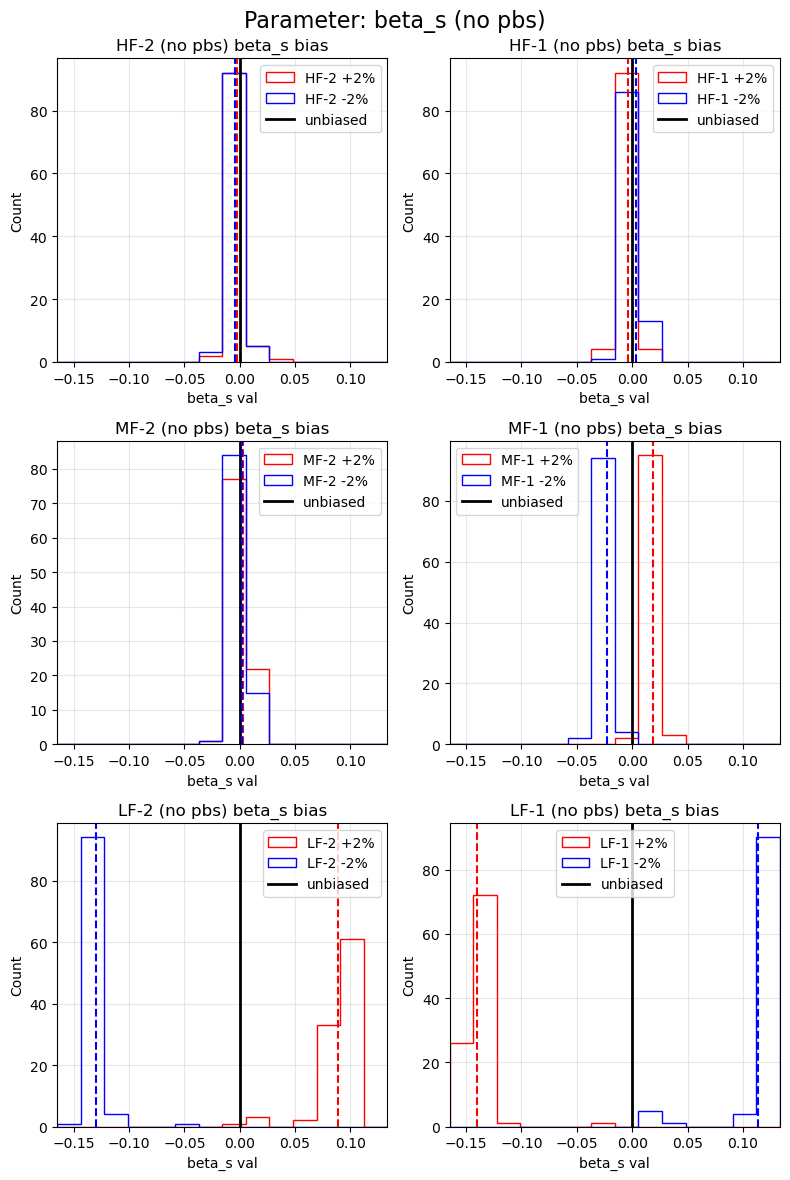

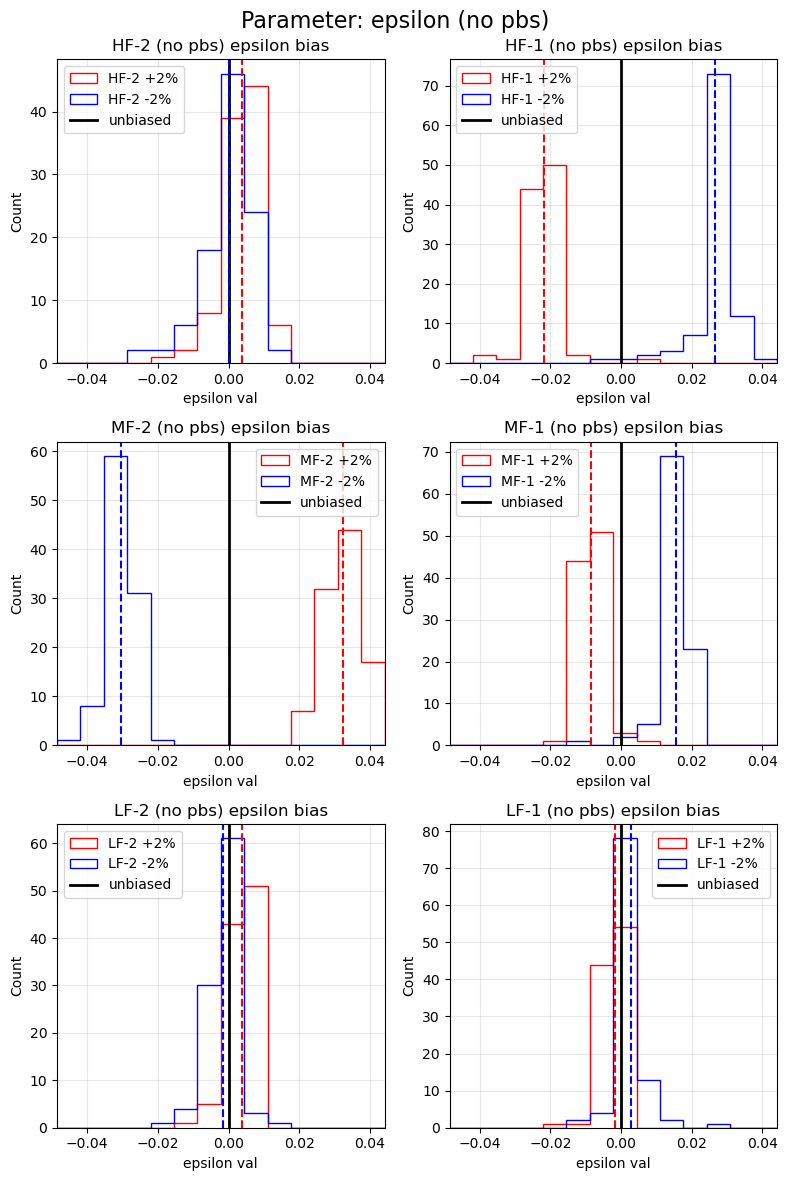

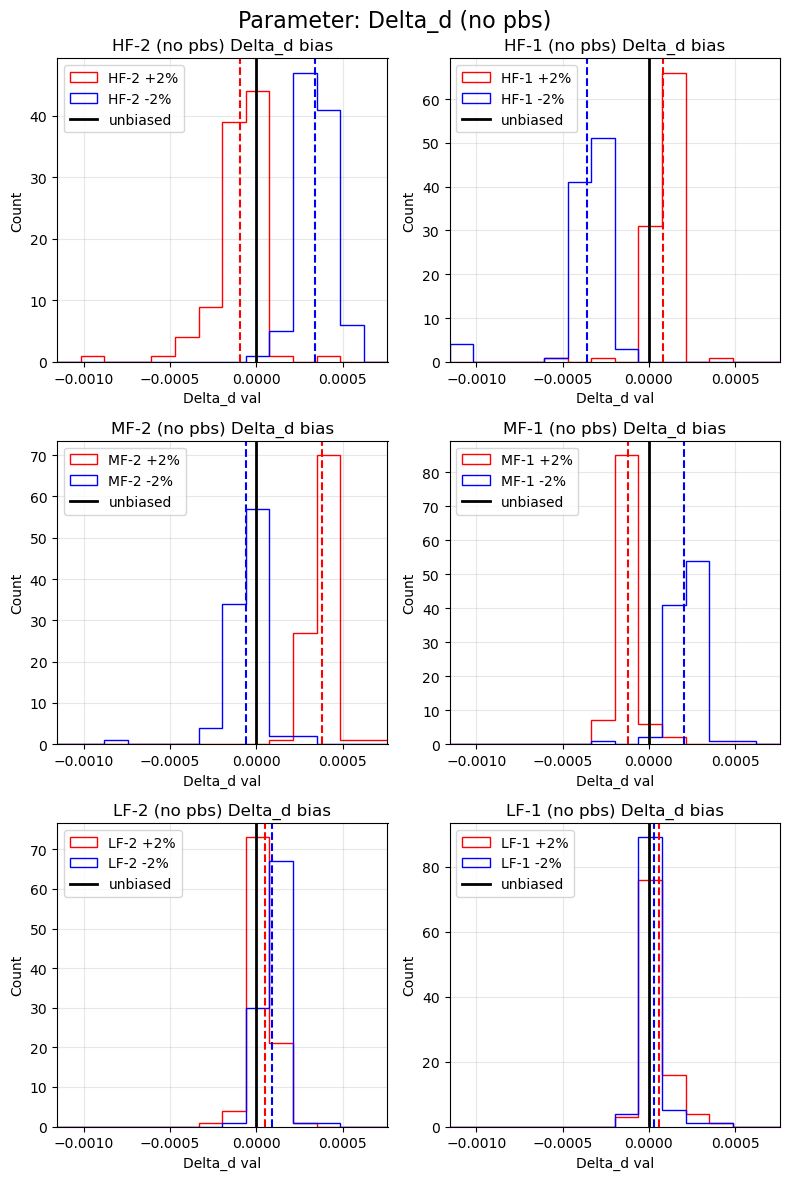

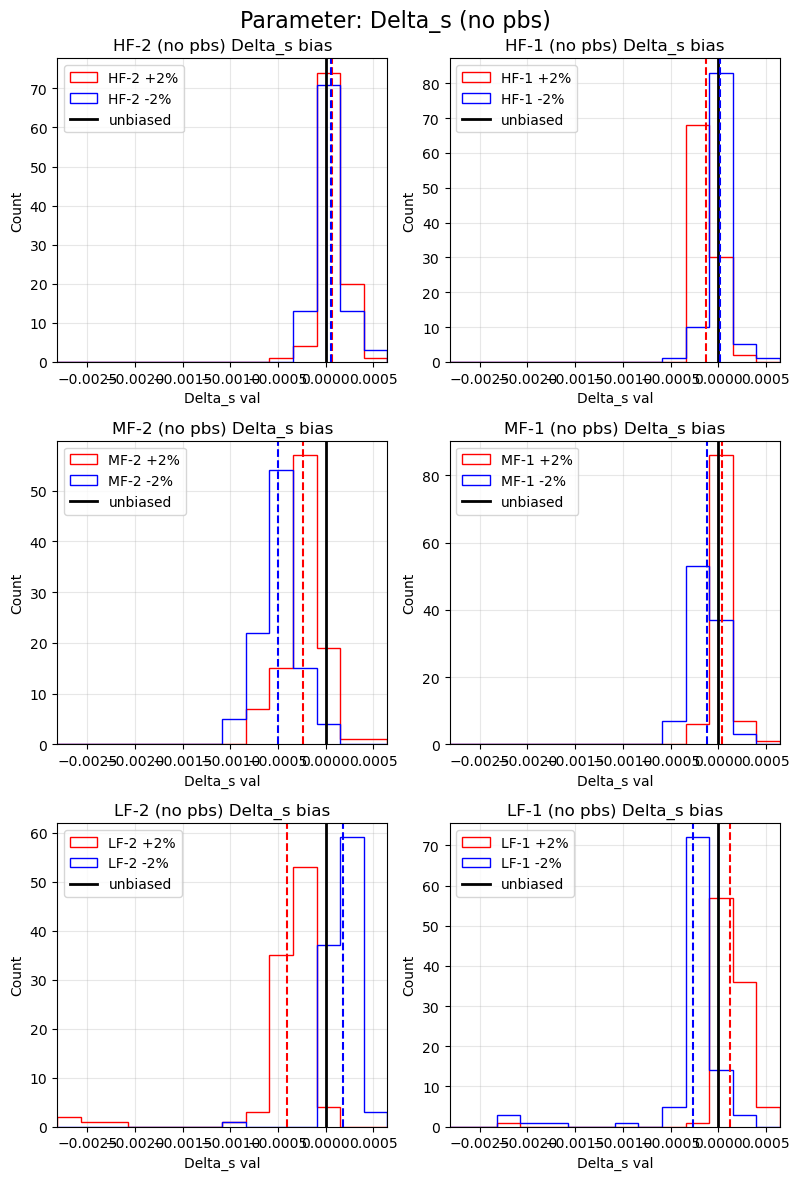

In [10]:
parameters = ['r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s']

bands_data_nopbs = []
for band in ['HF-2', 'HF-1', 'MF-2', 'MF-1', 'LF-2', 'LF-1']:
    band_clean = band.replace('-', '')
    pos_var = f"bias{band_clean}_2_nopbs"  
    neg_var = f"bias{band_clean}_neg2_nopbs" 
    bands_data_nopbs.append((bias_dict_nopbs[pos_var], bias_dict_nopbs[neg_var], band))

for param in parameters:
    all_param_data = []
    for pos_data, neg_data, _ in bands_data_nopbs:
        all_param_data.extend(pos_data[param])
        all_param_data.extend(neg_data[param])
    
    param_min = min(all_param_data)
    param_max = max(all_param_data)
    bin_edges = np.linspace(param_min, param_max, 15)
    
    fig, axes = plt.subplots(3, 2, figsize=(8, 12))
    axes = axes.flatten()
    
    for i, (pos_data, neg_data, band_name) in enumerate(bands_data_nopbs):
        ax = axes[i]
        
        ax.hist(pos_data[param], bins=bin_edges, color='red', label=f'{band_name} +2%', histtype='step')
        ax.hist(neg_data[param], bins=bin_edges, color='blue', label=f'{band_name} -2%', histtype='step')
        
        ax.axvline(0, color='black', linewidth=2, label='unbiased')
        ax.axvline(pos_data[param].mean(), color='red', linestyle='--')
        ax.axvline(neg_data[param].mean(), color='blue', linestyle='--')
        
        ax.set_xlabel(f'{param} val')
        ax.set_ylabel('Count')
        ax.set_title(f'{band_name} (no pbs) {param} bias')
        ax.set_xlim(param_min, param_max)
        ax.legend()
        ax.grid(alpha=0.3)
    
    plt.suptitle(f'Parameter: {param} (no pbs)', fontsize=16)
    plt.tight_layout()
    plt.show()

In [11]:
#this run needed some cleaning- some realizations errored

params_f2 = np.load('mlsearch/ph2_mlsearch_f2_y20_n3_diag0_full_withpbs.npy').T
df_f2 = pd.DataFrame(params_f2, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])
df_f2 = df_f2.drop(index=62).reset_index(drop=True)

bands = ['HF-2', 'HF-1', 'MF-2', 'MF-1', 'LF-2', 'LF-1']
bias_values = ['+2pct', '-2pct']
columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s']

df_dict_f2 = {}
bias_dict_f2 = {}

for band in bands:
    for bias in bias_values:
        band_clean = band.replace('-', '')
        if bias == '+2pct':
            bias_clean = '2_'
        else:
            bias_clean = 'neg2_'
        
        var_name = f"{band_clean}_{bias_clean}f2" 
        filename = f'mlsearch_bandpass_v2/ph2_mlsearch_f2_y20_n3_diag0_full_withpbs_{band}_{bias}.npy'
        params = np.load(filename).T
        df_dict_f2[var_name] = pd.DataFrame(params, columns=columns)
        df_dict_f2[var_name] = df_dict_f2[var_name].drop(index=62).reset_index(drop=True)
        df_dict_f2[var_name] = df_dict_f2[var_name][df_dict_f2[var_name]['status'] == 0].reset_index(drop=True)
        min_length = min(len(df_f2), len(df_dict_f2[var_name]))
        bias_dict_f2[f"bias{var_name}"] = df_dict_f2[var_name].iloc[:min_length] - df_f2.iloc[:min_length]

summary_data_f2 = {}
for band in bands:
    for bias in bias_values:
        band_clean = band.replace('-', '')
        if bias == '+2pct':
            bias_clean = '2_'
        else:
            bias_clean = 'neg2_'
        
        var_name = f"{band_clean}_{bias_clean}f2"
        bias_var = f"bias{var_name}"
        label = f"{band} {bias.replace('pct', '%')}"
        summary_data_f2[label] = (bias_dict_f2[bias_var].mean().round(4).astype(str) + 
                                    ' ± ' + 
                                    bias_dict_f2[bias_var].std().round(4).astype(str))

summary_stats_f2 = pd.DataFrame(summary_data_f2)
summary_stats_f2

HF-2 +2%             HF-2 -2%            HF-1 +2%  \
status            0.0 ± 0.0            0.0 ± 0.0           0.0 ± 0.0   
fval     874.7076 ± 51.1094  1247.3599 ± 53.0345  1515.7644 ± 66.891   
r           0.0028 ± 0.0009       0.007 ± 0.0009     0.0005 ± 0.0002   
A_d        -0.0339 ± 0.0067      0.2682 ± 2.0581    -0.0039 ± 0.0052   
alpha_d    -0.1624 ± 0.0082      0.1637 ± 0.0309     -0.053 ± 0.0054   
beta_d     -0.1092 ± 0.0027      0.1237 ± 0.0035    -0.0205 ± 0.0017   
A_s           0.046 ± 0.071      0.0026 ± 0.0375     0.0538 ± 0.0479   
alpha_s    -0.0388 ± 0.0948     -0.0161 ± 0.0835    -0.0433 ± 0.0768   
beta_s     -0.0007 ± 0.0088       0.007 ± 0.0078    -0.0027 ± 0.0047   
epsilon    -0.0345 ± 0.0129      0.0202 ± 0.0088    -0.0053 ± 0.0063   
Delta_d        0.0 ± 0.0001      0.0005 ± 0.0001     0.0003 ± 0.0001   
Delta_s    -0.0002 ± 0.0004      0.0001 ± 0.0002     0.0001 ± 0.0001   

                    HF-1 -2%            MF-2 +2%            MF-2 -2%  \
status             0.0 ± 0.0           0.0 ± 0.0           0.0 ± 0.0   
fval     1211.7382 ± 65.5246  537.0083 ± 47.0382  590.4863 ± 46.8387   
r           -0.0003 ± 0.0003      0.007 ± 0.0012     0.0014 ± 0.0008   
A_d         -0.0039 ± 0.0037     0.0029 ± 0.0064     -0.008 ± 0.0037   
alpha_d      0.0435 ± 0.0045     0.0326 ± 0.0098    -0.0266 ± 0.0035   
beta_d       0.0099 ± 0.0011      0.0861 ± 0.004    -0.0624 ± 0.0021   
A_s          0.0703 ± 0.0333    -0.0249 ± 0.0477    -0.0208 ± 0.0379   
alpha_s      -0.0541 ± 0.055     -0.0176 ± 0.108     0.0269 ± 0.0577   
beta_s       0.0041 ± 0.0047     0.0146 ± 0.0158     0.0014 ± 0.0092   
epsilon     -0.0104 ± 0.0031     0.0314 ± 0.0121    -0.0388 ± 0.0083   
Delta_d        -0.0003 ± 0.0     0.0005 ± 0.0001    -0.0001 ± 0.0001   
Delta_s        -0.0 ± 0.0001     -0.001 ± 0.0006    -0.0015 ± 0.0007   

                  MF-1 +2%            MF-1 -2%           LF-2 +2%  \
status           0.0 ± 0.0           0.0 ± 0.0          0.0 ± 0.0   
fval     83.9018 ± 18.2596  107.9326 ± 39.5769  34.9973 ± 26.6747   
r            -0.0 ± 0.0003      0.002 ± 0.0013       0.0 ± 0.0009   
A_d        -0.0024 ± 0.004     0.0009 ± 0.0049   -0.0006 ± 0.0048   
alpha_d    0.0075 ± 0.0038    -0.0055 ± 0.0121    0.0002 ± 0.0133   
beta_d     0.0057 ± 0.0013     -0.002 ± 0.0058   -0.0002 ± 0.0041   
A_s       -0.0122 ± 0.0425     0.0052 ± 0.0455    0.0301 ± 0.0456   
alpha_s    0.0027 ± 0.0701    -0.0133 ± 0.1074   -0.0168 ± 0.0942   
beta_s     0.0162 ± 0.0051    -0.0164 ± 0.0245     0.087 ± 0.0167   
epsilon   -0.0075 ± 0.0036     0.0101 ± 0.0228   -0.0061 ± 0.0185   
Delta_d      -0.0002 ± 0.0     0.0003 ± 0.0002      -0.0 ± 0.0001   
Delta_s      -0.0 ± 0.0002    -0.0002 ± 0.0009   -0.0004 ± 0.0006   

                  LF-2 -2%          LF-1 +2%          LF-1 -2%  
status           0.0 ± 0.0         0.0 ± 0.0         0.0 ± 0.0  
fval     28.8018 ± 23.4884  14.7003 ± 7.3816  18.7393 ± 8.8871  
r          0.0004 ± 0.0007   0.0003 ± 0.0002     -0.0 ± 0.0003  
A_d        0.0005 ± 0.0041   0.0014 ± 0.0036  -0.0012 ± 0.0051  
alpha_d    0.0004 ± 0.0063     -0.0 ± 0.0027  -0.0008 ± 0.0075  
beta_d    -0.0001 ± 0.0037  -0.0002 ± 0.0008     -0.0 ± 0.0018  
A_s       -0.0382 ± 0.0318   0.1599 ± 0.0274  -0.1284 ± 0.0554  
alpha_s    0.0071 ± 0.0573   0.0094 ± 0.0506  -0.0211 ± 0.1082  
beta_s     -0.116 ± 0.0192  -0.1323 ± 0.0058   0.1154 ± 0.0083  
epsilon    0.0047 ± 0.0129    0.002 ± 0.0023  -0.0024 ± 0.0059  
Delta_d       0.0 ± 0.0001         0.0 ± 0.0        -0.0 ± 0.0  
Delta_s    0.0004 ± 0.0004   0.0003 ± 0.0001  -0.0002 ± 0.0001

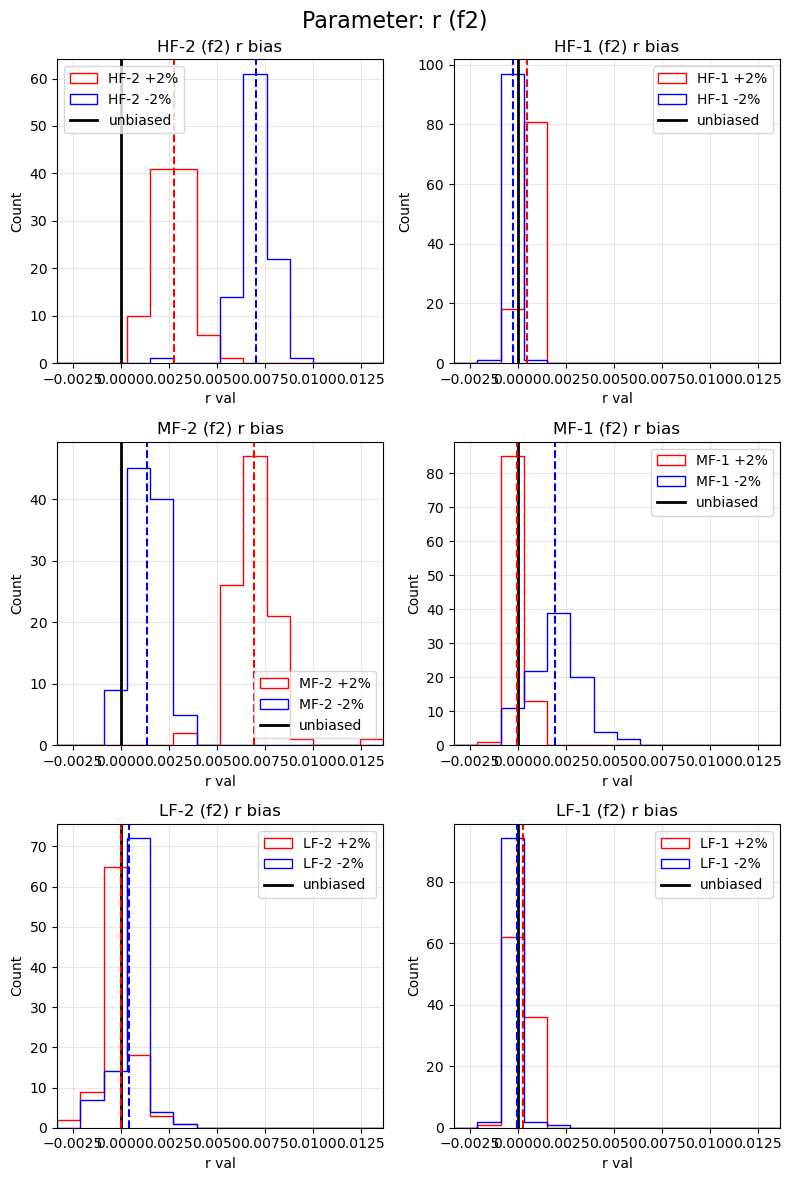

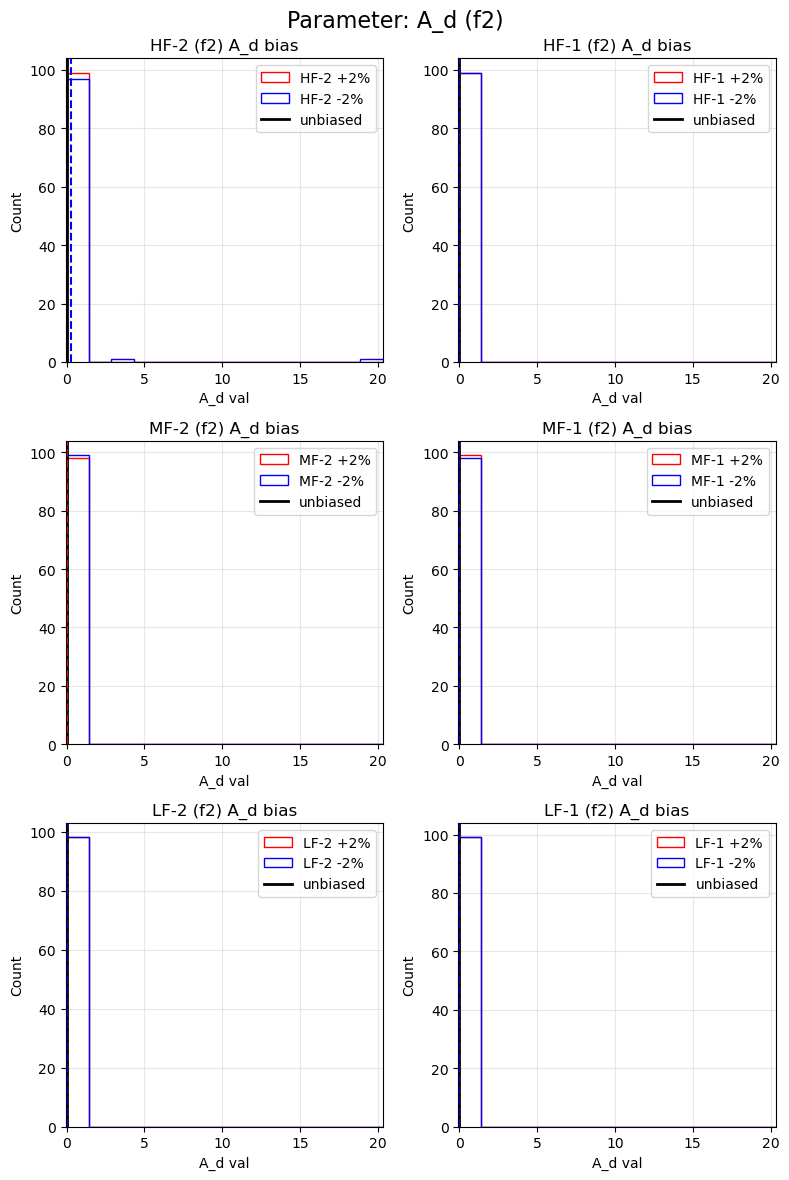

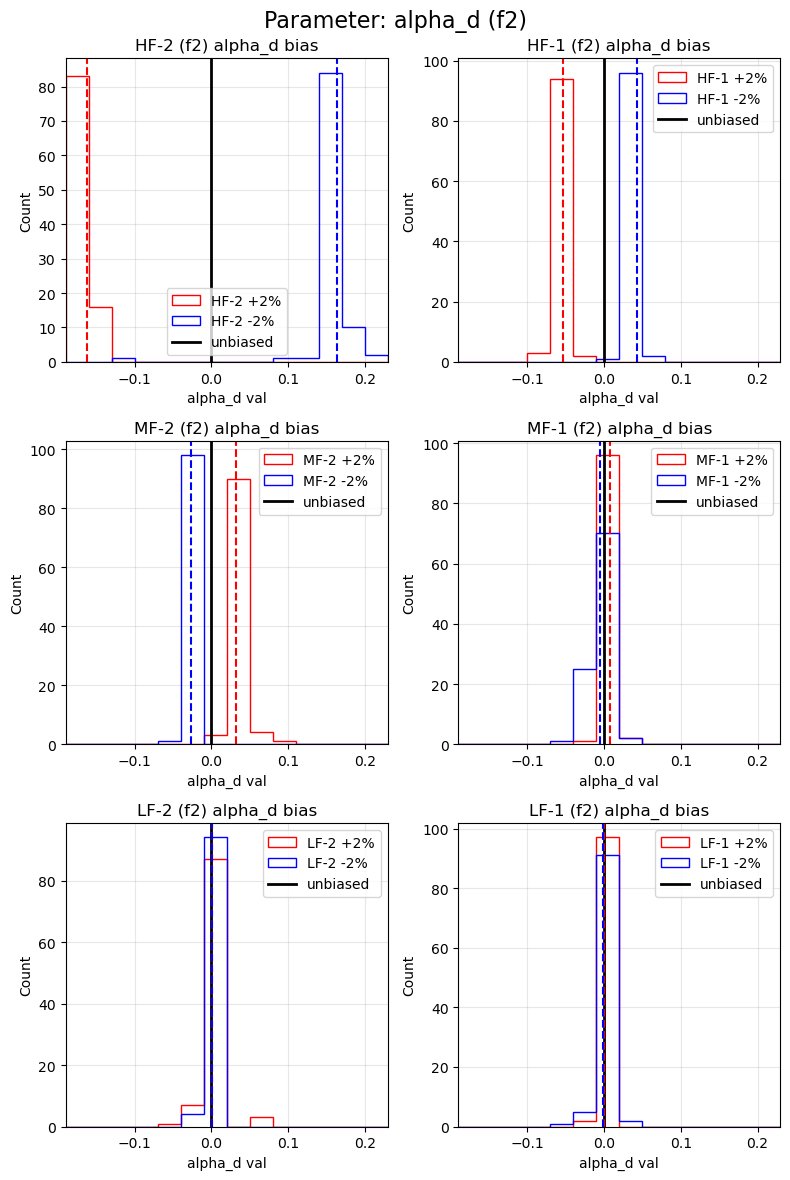

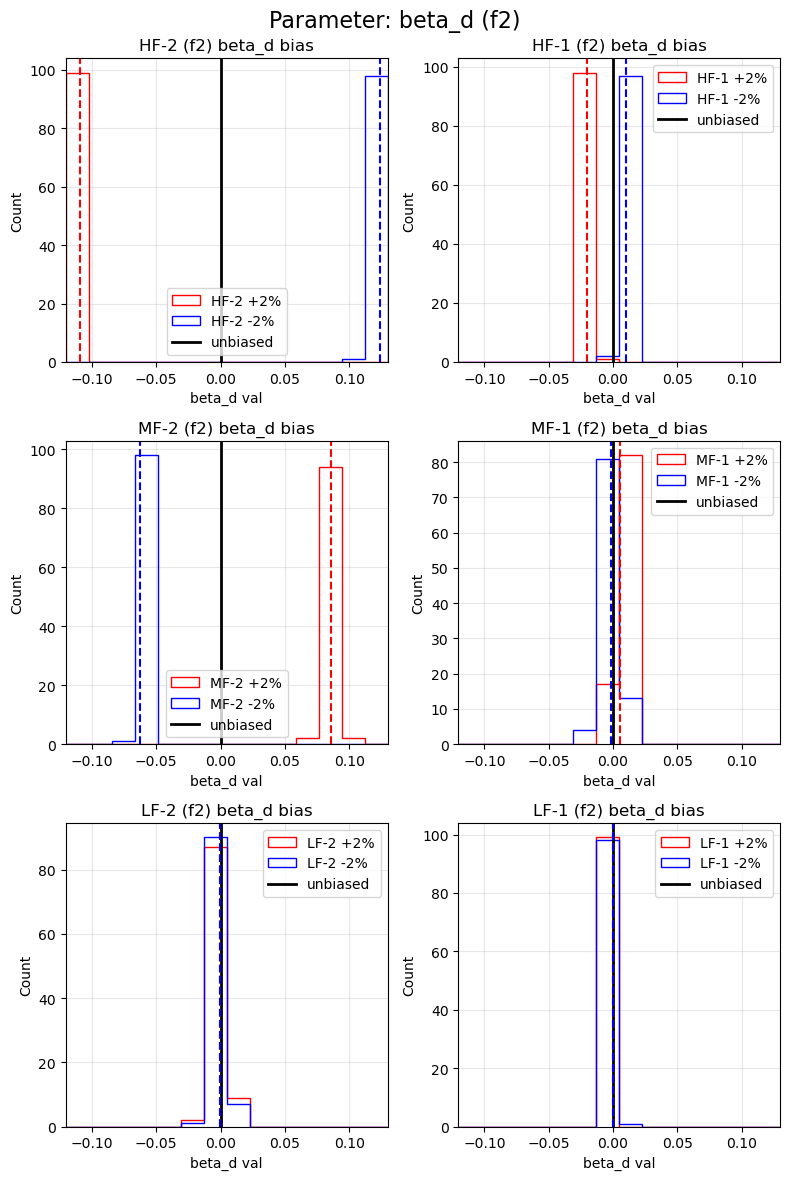

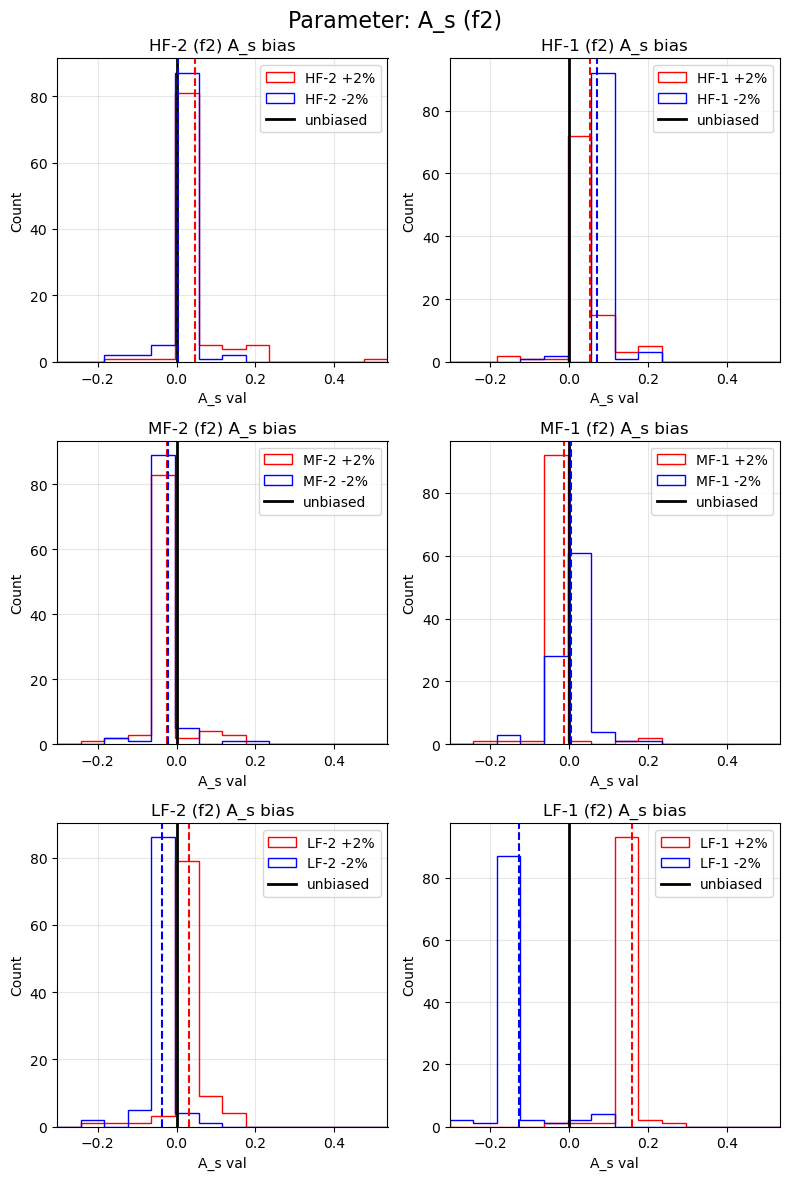

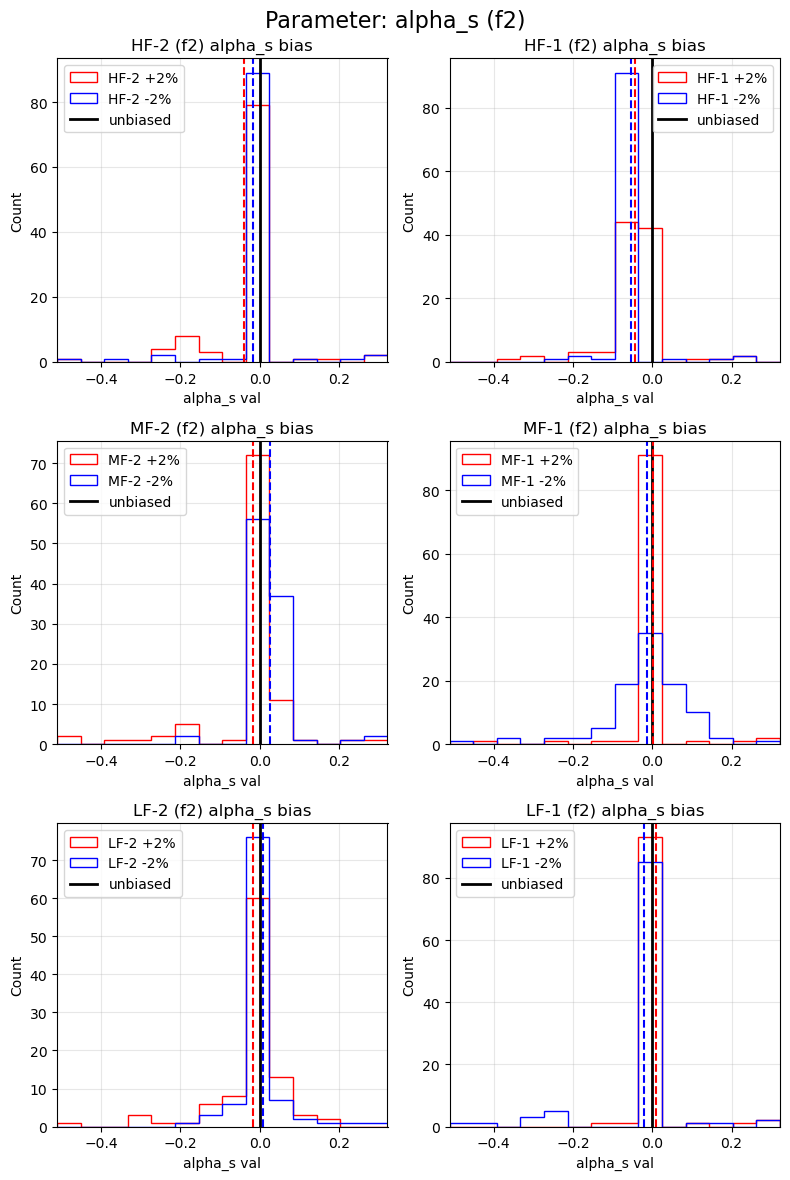

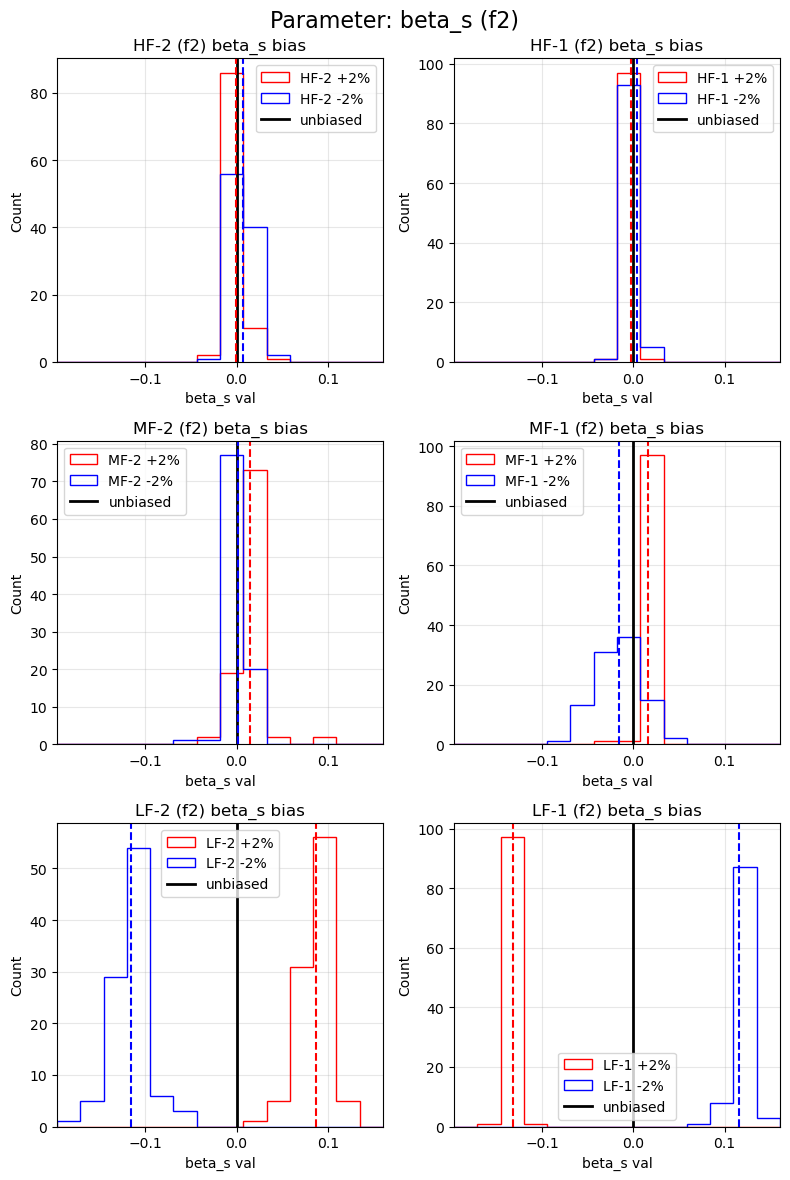

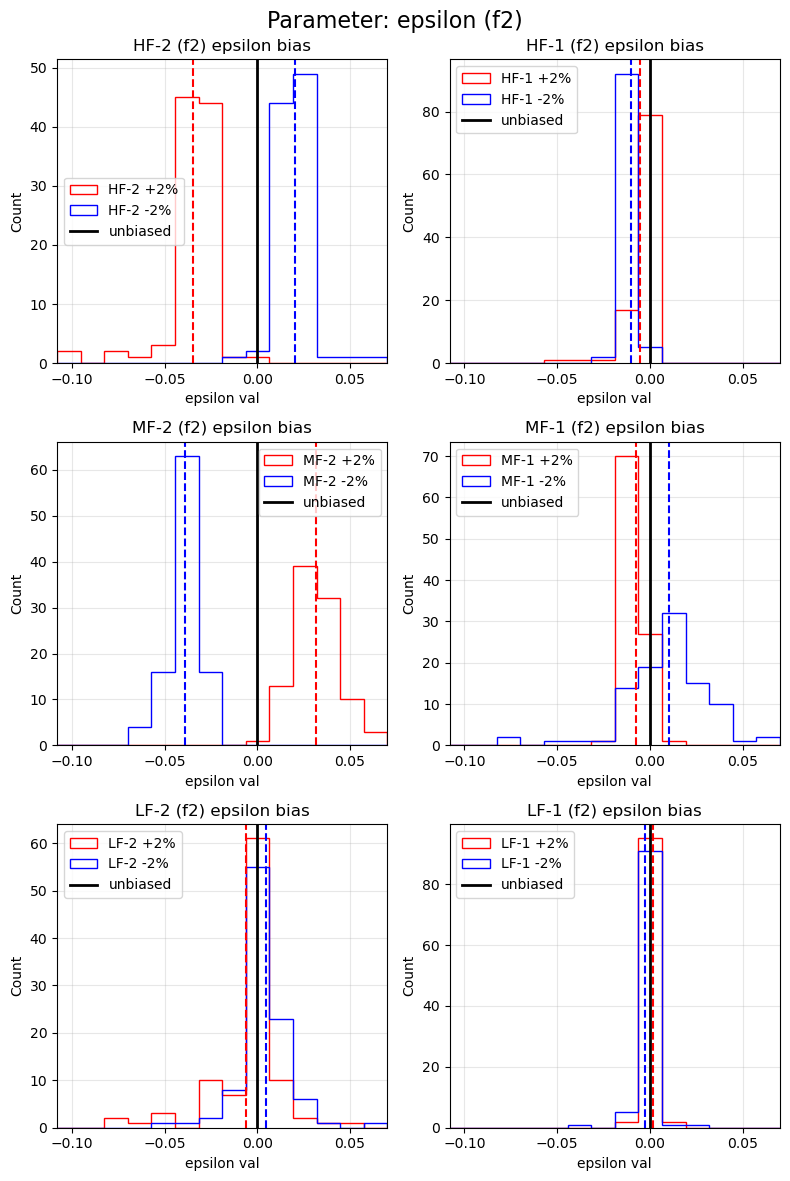

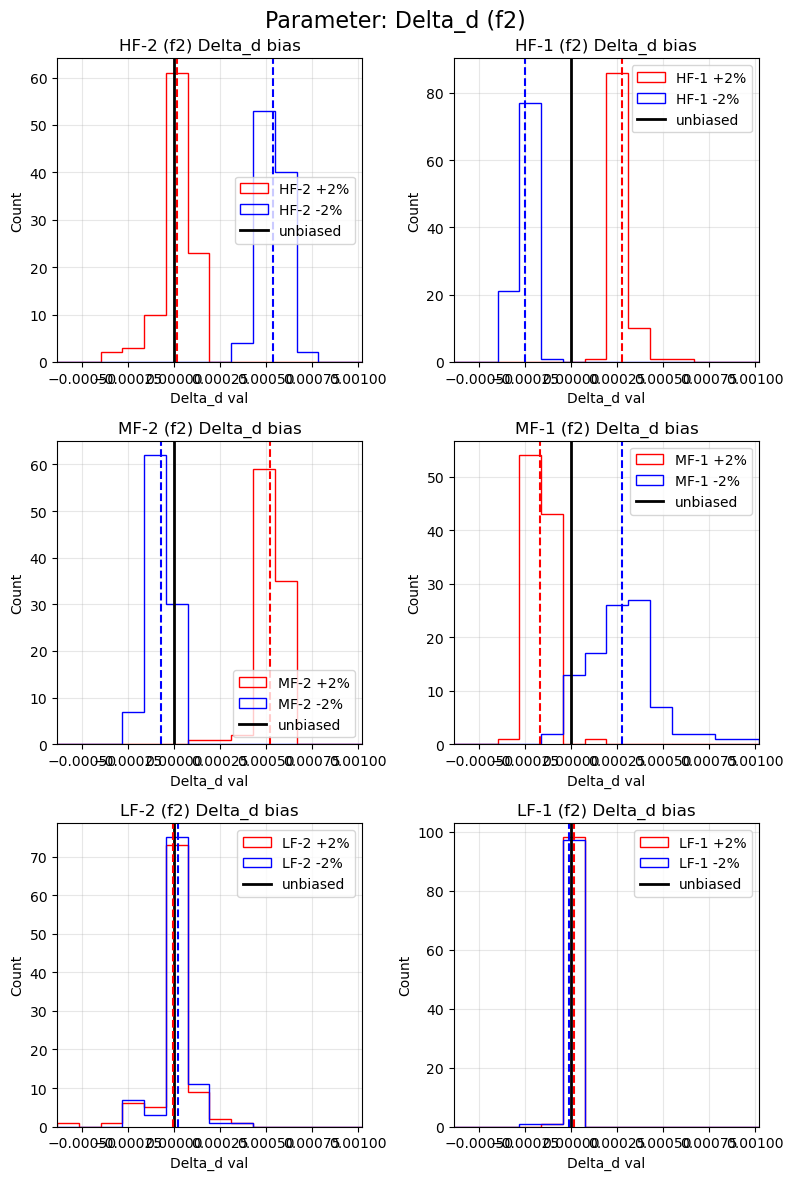

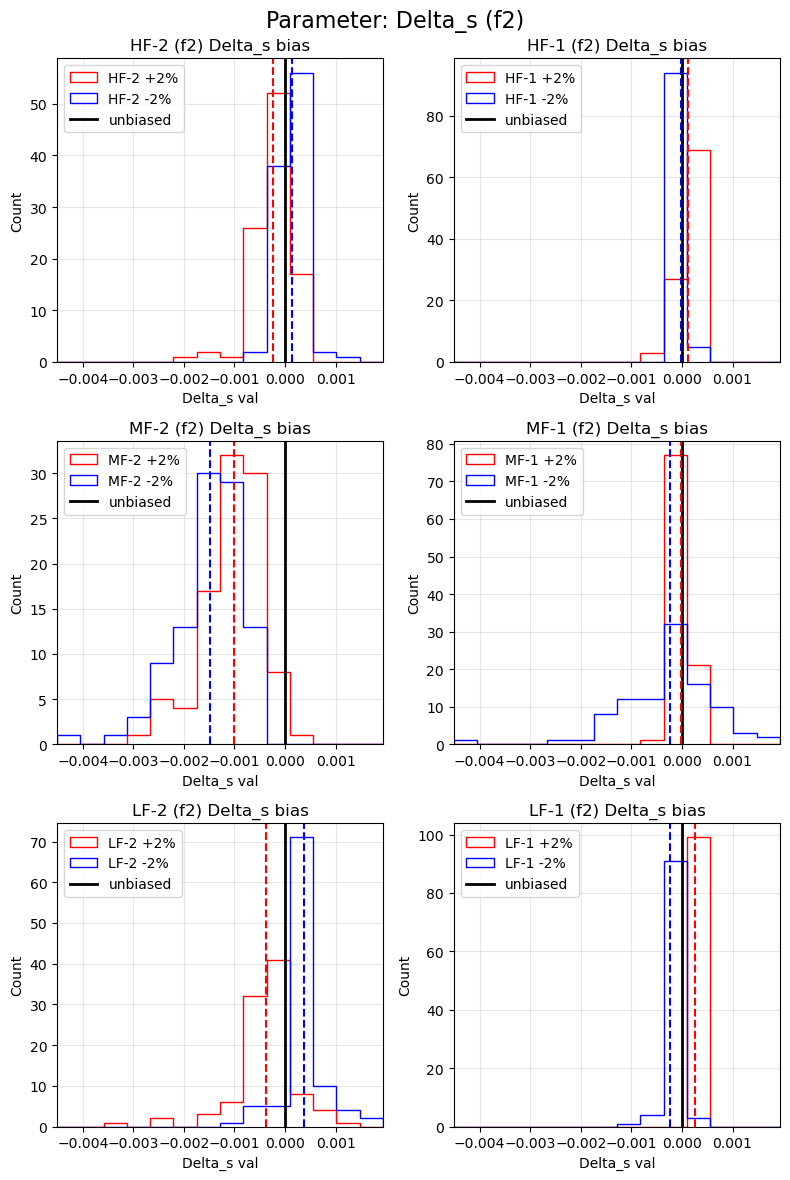

In [12]:
parameters = ['r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s']

bands_data_f2 = []
for band in ['HF-2', 'HF-1', 'MF-2', 'MF-1', 'LF-2', 'LF-1']:
    band_clean = band.replace('-', '')
    pos_var = f"bias{band_clean}_2_f2"  
    neg_var = f"bias{band_clean}_neg2_f2" 
    bands_data_f2.append((bias_dict_f2[pos_var], bias_dict_f2[neg_var], band))

for param in parameters:
    all_param_data = []
    for pos_data, neg_data, _ in bands_data_f2:
        all_param_data.extend(pos_data[param])
        all_param_data.extend(neg_data[param])
    
    param_min = min(all_param_data)
    param_max = max(all_param_data)
    bin_edges = np.linspace(param_min, param_max, 15)
    
    fig, axes = plt.subplots(3, 2, figsize=(8, 12))
    axes = axes.flatten()
    
    for i, (pos_data, neg_data, band_name) in enumerate(bands_data_f2):
        ax = axes[i]
        
        ax.hist(pos_data[param], bins=bin_edges, color='red', label=f'{band_name} +2%', histtype='step')
        ax.hist(neg_data[param], bins=bin_edges, color='blue', label=f'{band_name} -2%', histtype='step')
        
        ax.axvline(0, color='black', linewidth=2, label='unbiased')
        ax.axvline(pos_data[param].mean(), color='red', linestyle='--')
        ax.axvline(neg_data[param].mean(), color='blue', linestyle='--')
        
        ax.set_xlabel(f'{param} val')
        ax.set_ylabel('Count')
        ax.set_title(f'{band_name} (f2) {param} bias')
        ax.set_xlim(param_min, param_max)
        ax.legend()
        ax.grid(alpha=0.3)
    
    plt.suptitle(f'Parameter: {param} (f2)', fontsize=16)
    plt.tight_layout()
    plt.show()

In [13]:
bands = ['HF-2', 'HF-1', 'MF-2', 'MF-1', 'LF-2', 'LF-1']
bias_values = ['+5pct', '-5pct']
columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s']

df_dict_5pct = {}
bias_dict_5pct = {}

for band in bands:
    for bias in bias_values:
        band_clean = band.replace('-', '')
        if bias == '+5pct':
            bias_clean = '5_'
        else:
            bias_clean = 'neg5_'
        
        var_name = f"{band_clean}_{bias_clean}5pct"
        filename = f'mlsearch_bandpass_v2/ph2_mlsearch_f1_y20_n3_diag0_full_withpbs_{band}_{bias}.npy'
        params = np.load(filename).T
        df_dict_5pct[var_name] = pd.DataFrame(params, columns=columns)
        bias_dict_5pct[f"bias{var_name}"] = df_dict_5pct[var_name] - df_withpbs

summary_data_5pct = {}
for band in bands:
    for bias in bias_values:
        band_clean = band.replace('-', '')
        if bias == '+5pct':
            bias_clean = '5_'
        else:
            bias_clean = 'neg5_'
        
        var_name = f"{band_clean}_{bias_clean}5pct"
        bias_var = f"bias{var_name}"
        label = f"{band} {bias.replace('pct', '%')}"
        summary_data_5pct[label] = (bias_dict_5pct[bias_var].mean().round(4).astype(str) + 
                                      ' ± ' + 
                                      bias_dict_5pct[bias_var].std().round(4).astype(str))

summary_stats_5pct = pd.DataFrame(summary_data_5pct)
summary_stats_5pct

HF-2 +5%             HF-2 -5%              HF-1 +5%  \
status              0.0 ± 0.0            0.0 ± 0.0             0.0 ± 0.0   
fval     2801.7573 ± 103.1783  3843.068 ± 127.2421  4939.5769 ± 150.8195   
r             0.0058 ± 0.0027      0.0047 ± 0.0004       0.0003 ± 0.0002   
A_d           -5.979 ± 2.3195      7.9789 ± 2.0628       -0.575 ± 0.5534   
alpha_d       0.0807 ± 0.2024      0.0034 ± 0.1128      -0.1403 ± 0.0431   
beta_d       -0.3599 ± 0.0156      0.3498 ± 0.0067      -0.0487 ± 0.0029   
A_s           -0.024 ± 0.0367     -0.0491 ± 0.0271      -0.0508 ± 0.0185   
alpha_s       0.0385 ± 0.0568       0.059 ± 0.0601       0.0571 ± 0.0397   
beta_s       -0.0124 ± 0.0088     -0.0102 ± 0.0065      -0.0083 ± 0.0036   
epsilon       -0.015 ± 0.0136      0.0023 ± 0.0097      -0.0211 ± 0.0047   
Delta_d      -0.0053 ± 0.0069      0.0007 ± 0.0002       0.0002 ± 0.0001   
Delta_s          0.0 ± 0.0003      0.0001 ± 0.0002          0.0 ± 0.0001   

                     HF-1 -5%             MF-2 +5%             MF-2 -5%  \
status              0.0 ± 0.0            0.0 ± 0.0            0.0 ± 0.0   
fval     4497.9464 ± 135.3674  1347.5927 ± 74.3809  1555.5762 ± 68.2437   
r            -0.0002 ± 0.0003      0.0048 ± 0.0023     -0.0001 ± 0.0014   
A_d          -0.5368 ± 0.5527      1.3049 ± 1.0401     -1.4054 ± 1.1366   
alpha_d       0.1049 ± 0.0431      0.0341 ± 0.0672      0.0048 ± 0.0838   
beta_d       -0.0379 ± 0.0041      0.2766 ± 0.0115      -0.1923 ± 0.005   
A_s          -0.0189 ± 0.0192     -0.0637 ± 0.0469     -0.0727 ± 0.0352   
alpha_s       0.0234 ± 0.0551      0.0682 ± 0.0839      0.0113 ± 0.0786   
beta_s       -0.0052 ± 0.0038       0.065 ± 0.0443      0.1551 ± 0.0656   
epsilon       0.0343 ± 0.0079      0.1213 ± 0.0422     -0.1512 ± 0.0358   
Delta_d       -0.003 ± 0.0006      0.0009 ± 0.0002     -0.0007 ± 0.0007   
Delta_s      -0.0001 ± 0.0001     -0.0065 ± 0.0041      -0.0145 ± 0.005   

                   MF-1 +5%            MF-1 -5%            LF-2 +5%  \
status            0.0 ± 0.0           0.0 ± 0.0           0.0 ± 0.0   
fval     276.1498 ± 28.7638  252.4444 ± 26.3692  291.7798 ± 25.8453   
r            0.001 ± 0.0002     0.0013 ± 0.0002     0.0005 ± 0.0003   
A_d        -0.2008 ± 0.6555    -0.1298 ± 0.7376     -0.3929 ± 0.631   
alpha_d      0.025 ± 0.0511     0.0022 ± 0.0533     0.0228 ± 0.0484   
beta_d      -0.002 ± 0.0033     0.0161 ± 0.0034     -0.0003 ± 0.001   
A_s        -0.0323 ± 0.0235     0.0029 ± 0.0194     0.0002 ± 0.0379   
alpha_s     0.0062 ± 0.0541     0.0372 ± 0.0453     0.0574 ± 0.0576   
beta_s      0.0392 ± 0.0099    -0.0568 ± 0.0045     0.1761 ± 0.0113   
epsilon     -0.004 ± 0.0044     0.0398 ± 0.0079     0.0032 ± 0.0053   
Delta_d    -0.0001 ± 0.0001     0.0006 ± 0.0001       -0.0 ± 0.0001   
Delta_s       -0.0 ± 0.0002     -0.001 ± 0.0005    -0.0021 ± 0.0012   

                   LF-2 -5%            LF-1 +5%            LF-1 -5%  
status            0.0 ± 0.0           0.0 ± 0.0           0.0 ± 0.0  
fval     271.9929 ± 23.2905  157.0732 ± 19.0761  157.8737 ± 18.9342  
r            0.002 ± 0.0003     0.0011 ± 0.0002     0.0002 ± 0.0002  
A_d         -0.299 ± 0.6921    -0.1624 ± 0.6917    -0.3314 ± 0.6442  
alpha_d     0.0171 ± 0.0505     0.0079 ± 0.0501     0.0184 ± 0.0474  
beta_d      0.0019 ± 0.0015      0.0008 ± 0.002      0.0001 ± 0.002  
A_s        -0.0501 ± 0.0281     0.4059 ± 0.0502    -0.2568 ± 0.0457  
alpha_s      0.0102 ± 0.053    -0.0143 ± 0.0513     0.0191 ± 0.0676  
beta_s     -0.4306 ± 0.0145    -0.3978 ± 0.0192     0.2611 ± 0.0079  
epsilon     -0.003 ± 0.0046     -0.0025 ± 0.006     0.0008 ± 0.0038  
Delta_d     0.0004 ± 0.0001     0.0002 ± 0.0001       -0.0 ± 0.0001  
Delta_s     0.0006 ± 0.0002     0.0004 ± 0.0002    -0.0007 ± 0.0004

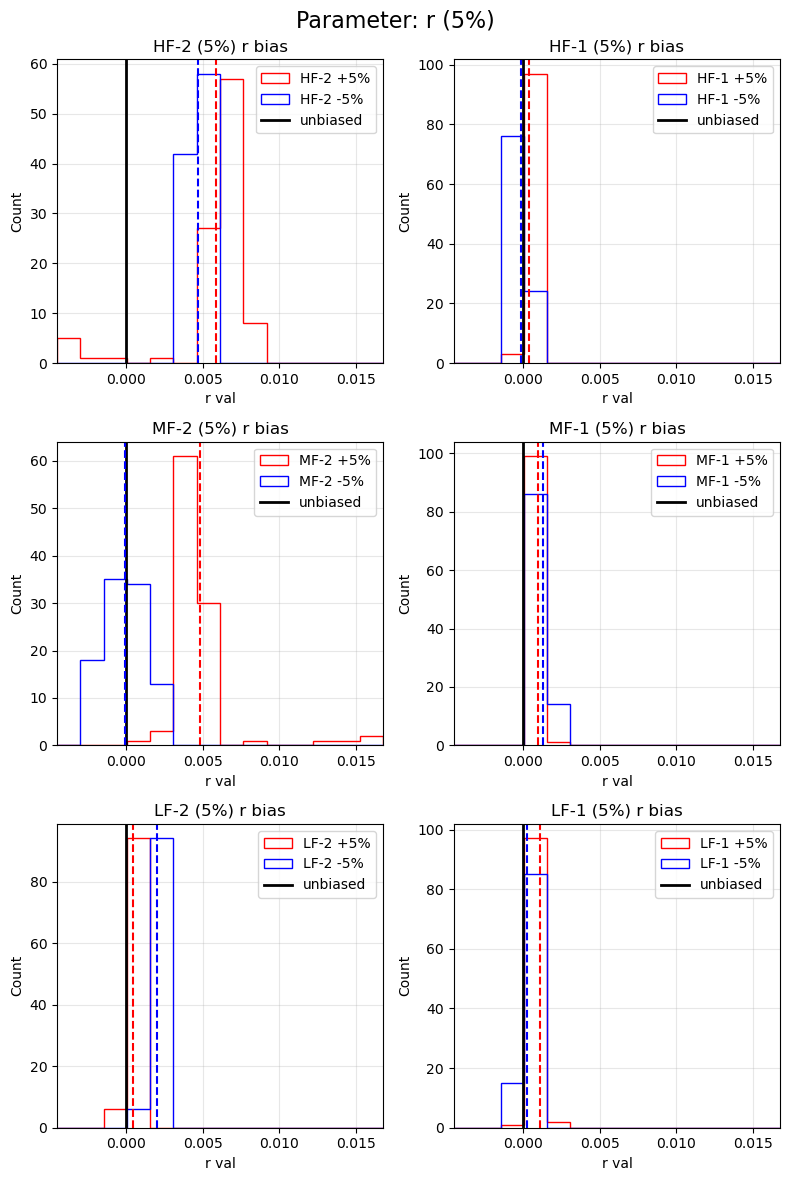

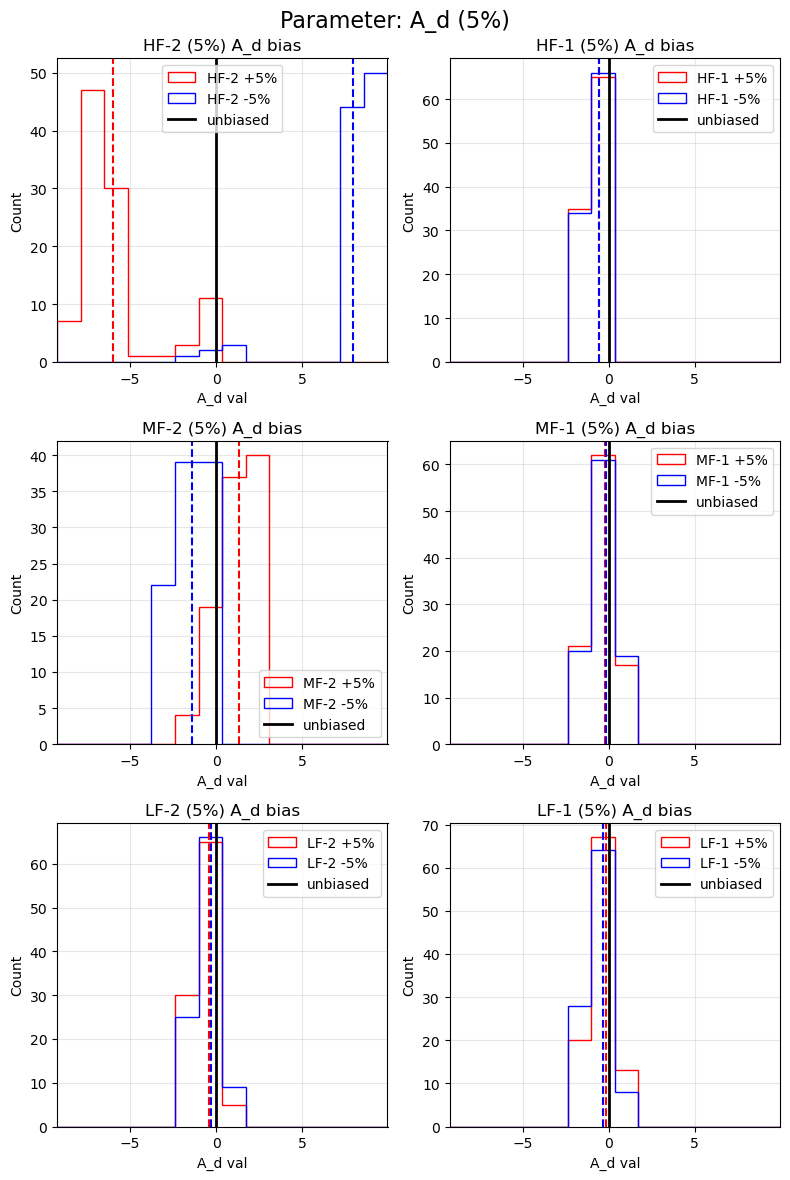

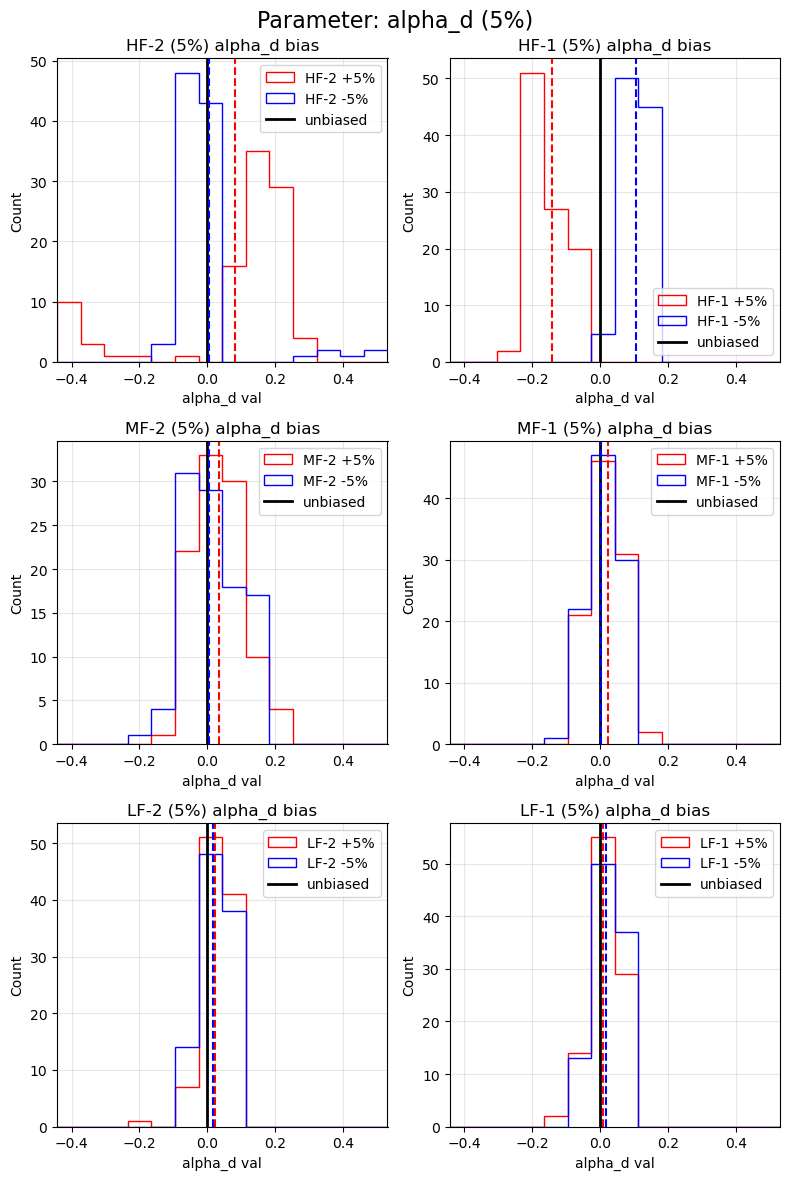

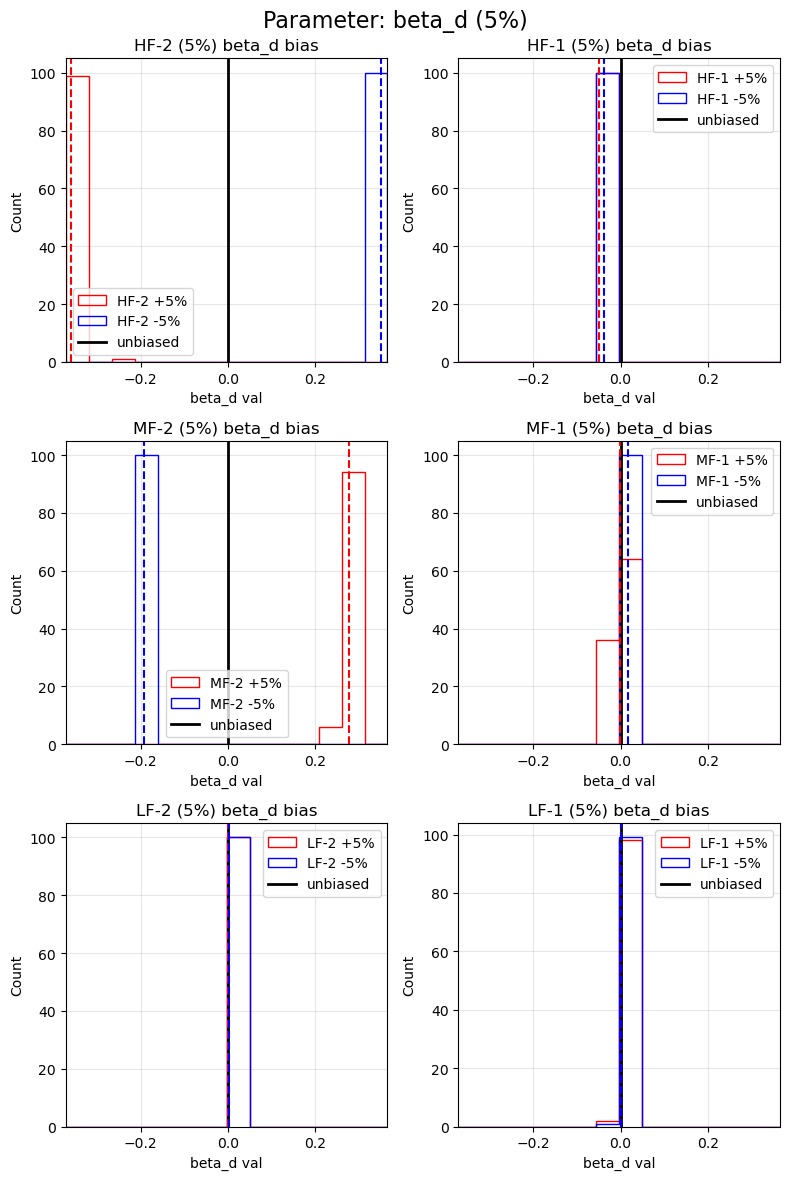

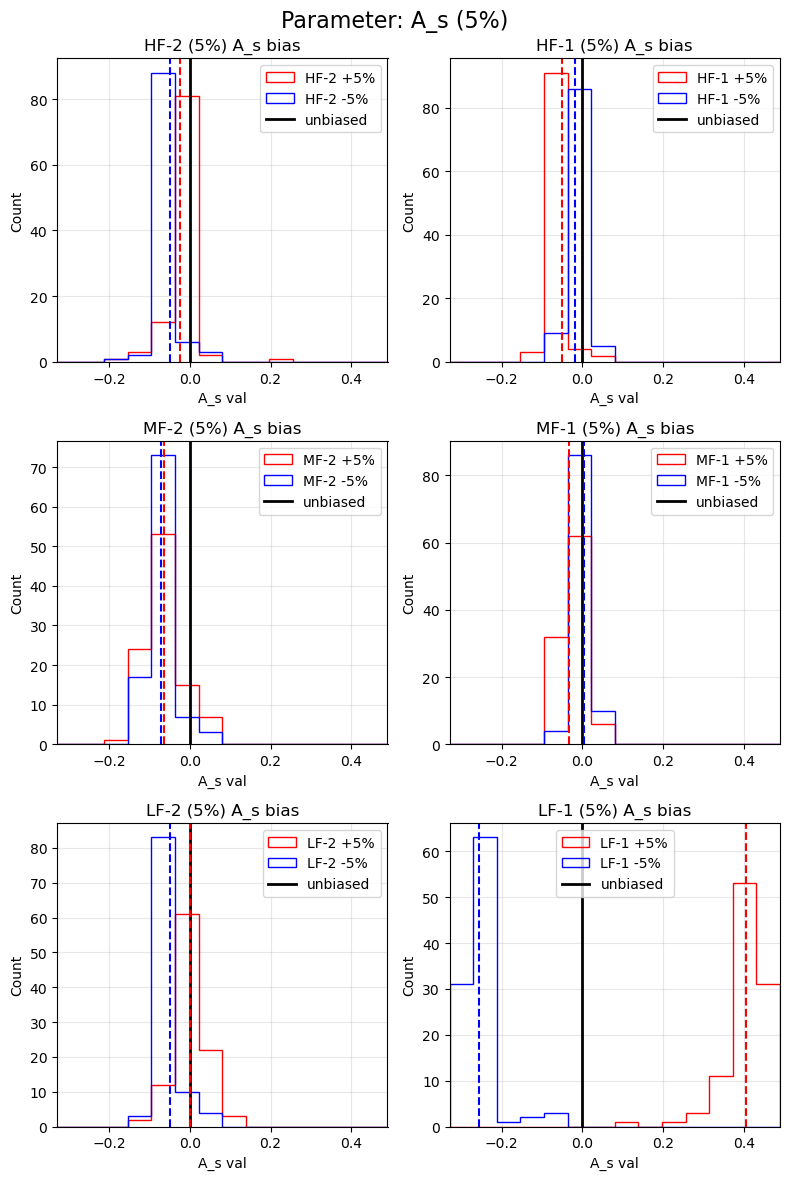

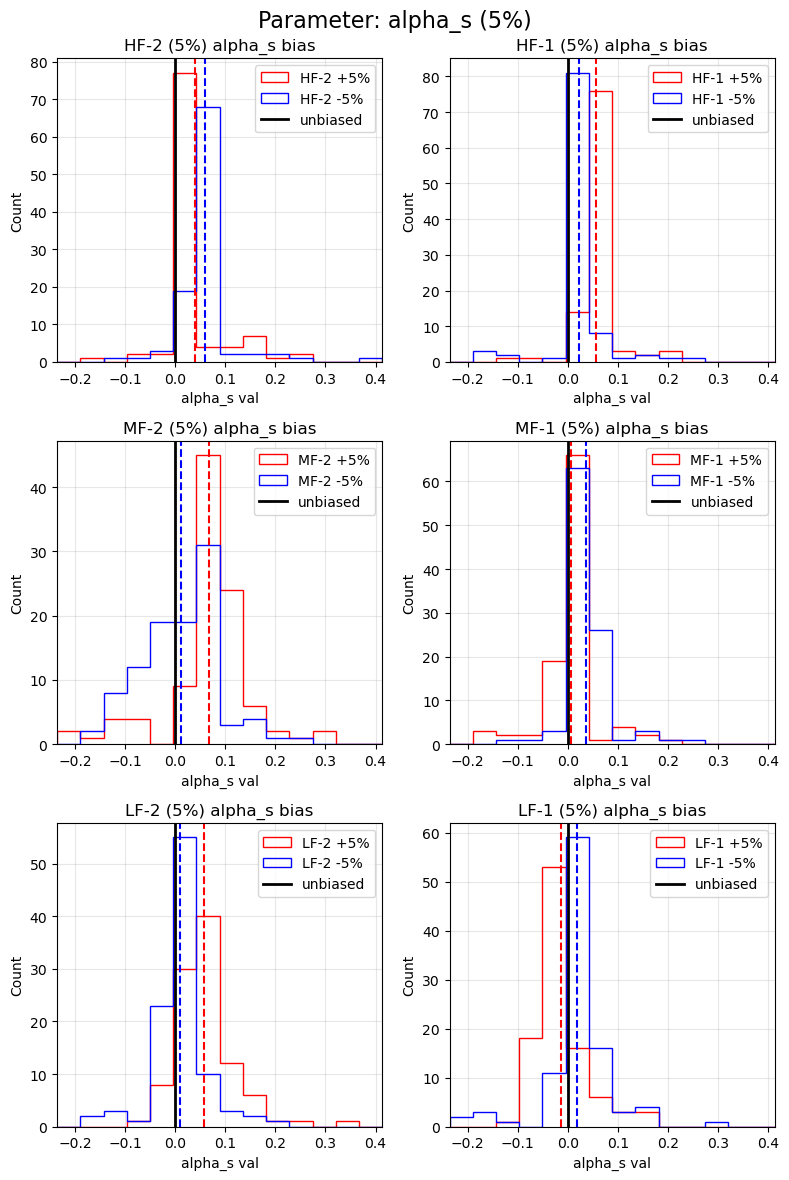

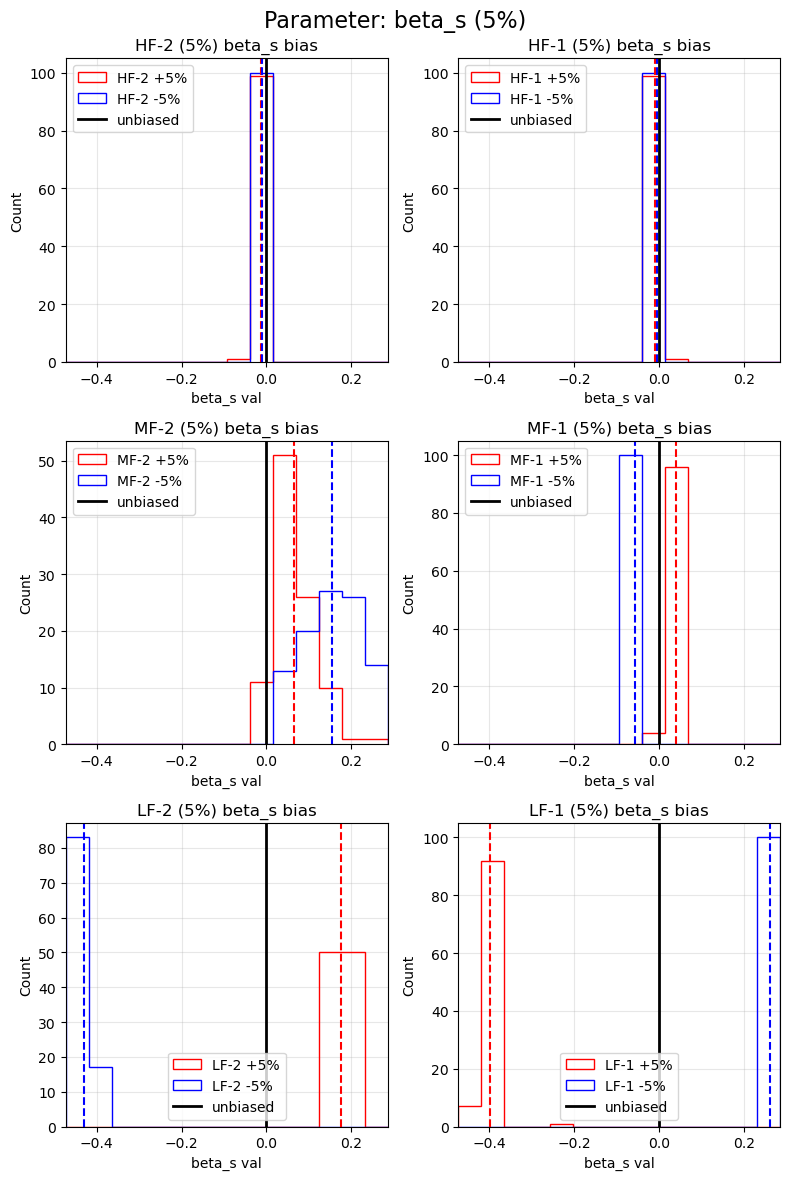

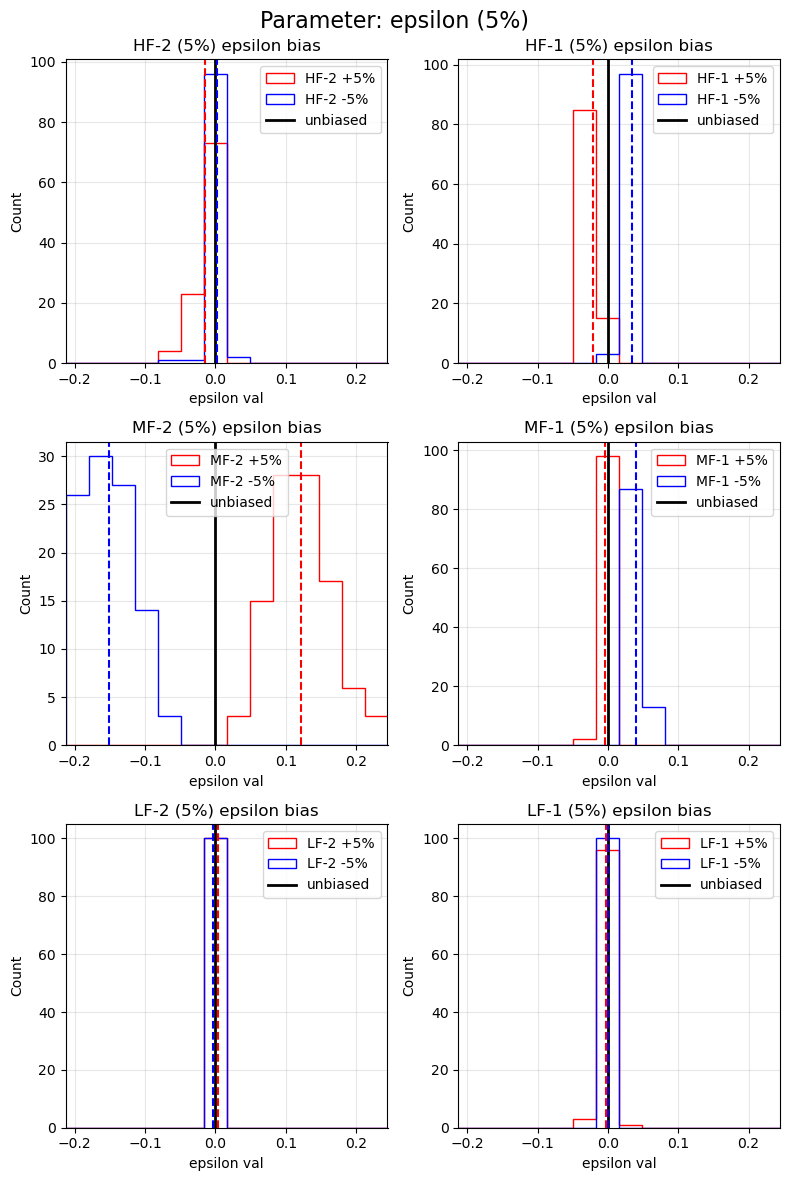

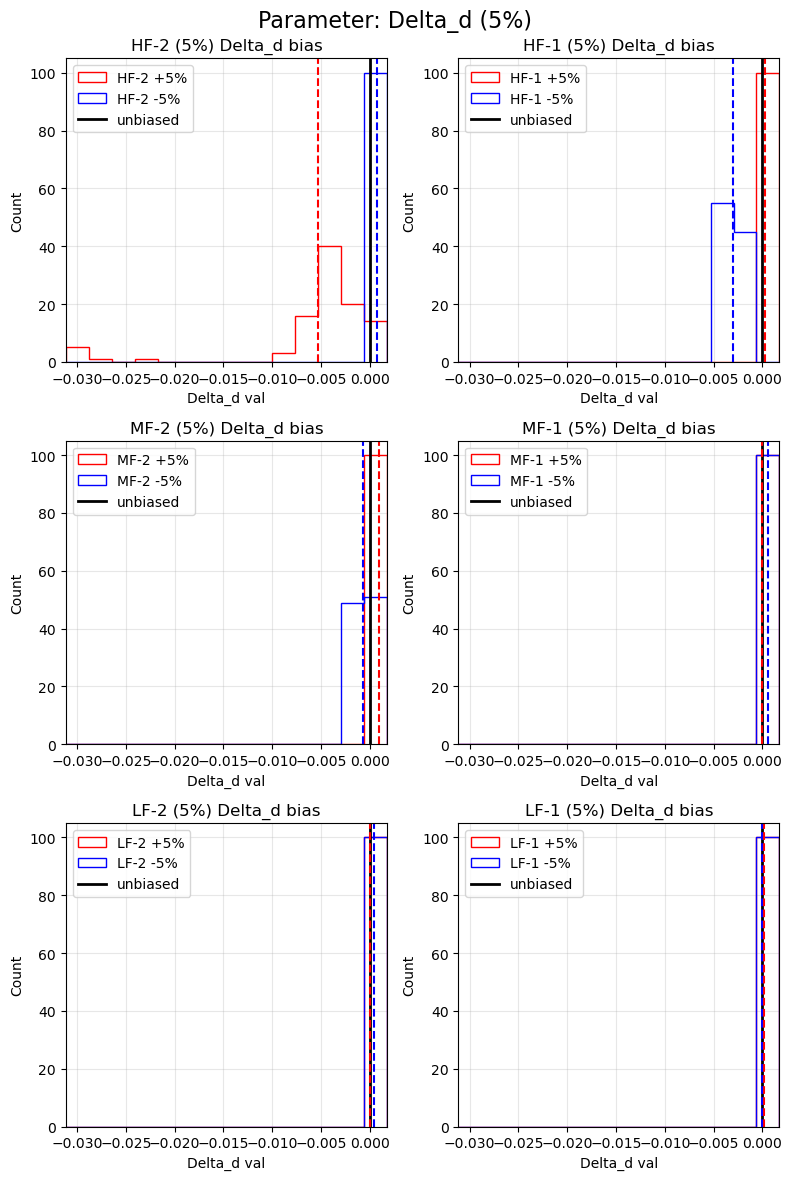

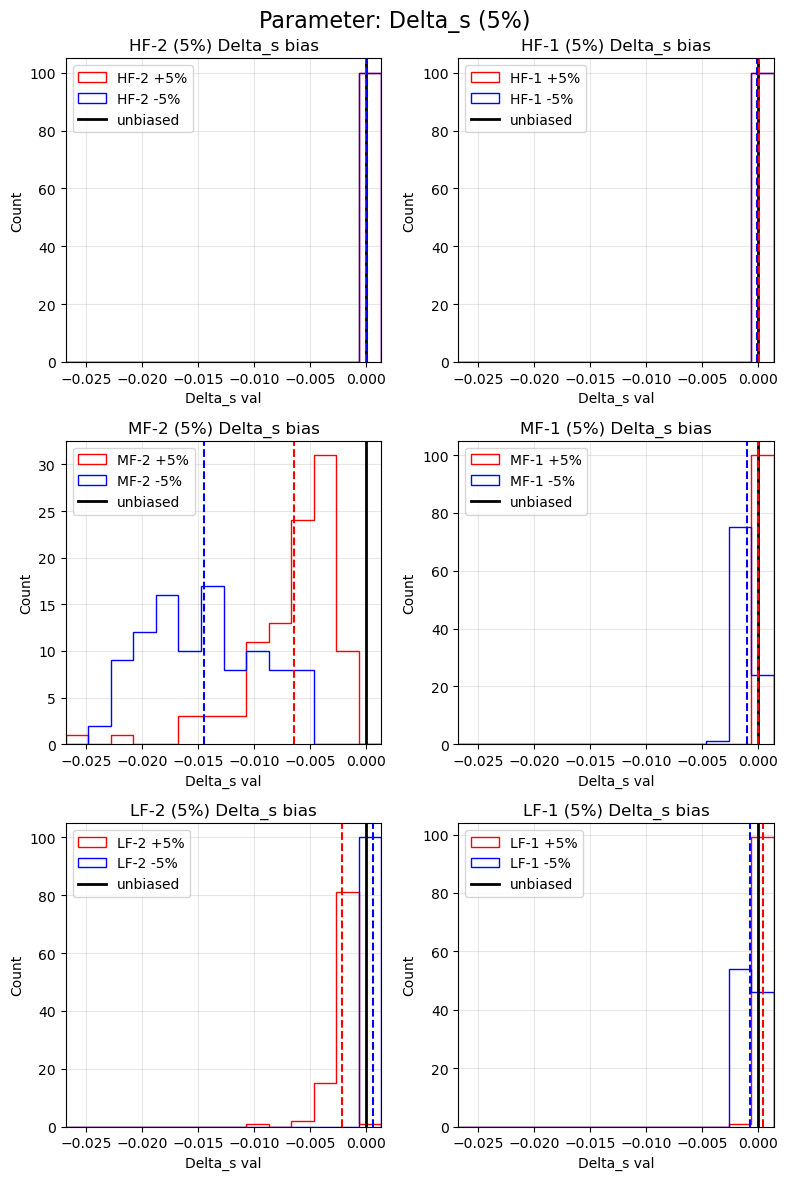

In [14]:
parameters = ['r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s']

bands_data_5pct = []
for band in ['HF-2', 'HF-1', 'MF-2', 'MF-1', 'LF-2', 'LF-1']:
    band_clean = band.replace('-', '')
    pos_var = f"bias{band_clean}_5_5pct"  
    neg_var = f"bias{band_clean}_neg5_5pct" 
    bands_data_5pct.append((bias_dict_5pct[pos_var], bias_dict_5pct[neg_var], band))

for param in parameters:
    all_param_data = []
    for pos_data, neg_data, _ in bands_data_5pct:
        all_param_data.extend(pos_data[param])
        all_param_data.extend(neg_data[param])
    
    param_min = min(all_param_data)
    param_max = max(all_param_data)
    bin_edges = np.linspace(param_min, param_max, 15)
    
    fig, axes = plt.subplots(3, 2, figsize=(8, 12))
    axes = axes.flatten()
    
    for i, (pos_data, neg_data, band_name) in enumerate(bands_data_5pct):
        ax = axes[i]
        
        ax.hist(pos_data[param], bins=bin_edges, color='red', label=f'{band_name} +5%', histtype='step')
        ax.hist(neg_data[param], bins=bin_edges, color='blue', label=f'{band_name} -5%', histtype='step')
        
        ax.axvline(0, color='black', linewidth=2, label='unbiased')
        ax.axvline(pos_data[param].mean(), color='red', linestyle='--')
        ax.axvline(neg_data[param].mean(), color='blue', linestyle='--')
        
        ax.set_xlabel(f'{param} val')
        ax.set_ylabel('Count')
        ax.set_title(f'{band_name} (5%) {param} bias')
        ax.set_xlim(param_min, param_max)
        ax.legend()
        ax.grid(alpha=0.3)
    
    plt.suptitle(f'Parameter: {param} (5%)', fontsize=16)
    plt.tight_layout()
    plt.show()

In [16]:
params_y10 = np.load('mlsearch/ph2_mlsearch_f1_y10_n3_diag0_full_withpbs.npy').T
df_y10 = pd.DataFrame(params_y10, columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s'])

bands = ['HF-2', 'HF-1', 'MF-2', 'MF-1', 'LF-2', 'LF-1']
bias_values = ['+2pct', '-2pct']
columns = ['status', 'fval', 'r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s']

df_dict_y10 = {}
bias_dict_y10 = {}

for band in bands:
    for bias in bias_values:
        band_clean = band.replace('-', '')
        if bias == '+2pct':
            bias_clean = '2_'
        else:
            bias_clean = 'neg2_'
        
        var_name = f"{band_clean}_{bias_clean}y10" 
        filename = f'mlsearch_bandpass_v2/ph2_mlsearch_f1_y10_n3_diag0_full_withpbs_{band}_{bias}.npy'
        params = np.load(filename).T
        df_dict_y10[var_name] = pd.DataFrame(params, columns=columns)
        bias_dict_y10[f"bias{var_name}"] = df_dict_y10[var_name] - df_y10

summary_data_y10 = {}
for band in bands:
    for bias in bias_values:
        band_clean = band.replace('-', '')
        if bias == '+2pct':
            bias_clean = '2_'
        else:
            bias_clean = 'neg2_'
        
        var_name = f"{band_clean}_{bias_clean}y10"
        bias_var = f"bias{var_name}"
        label = f"{band} {bias.replace('pct', '%')}"
        summary_data_y10[label] = (bias_dict_y10[bias_var].mean().round(4).astype(str) + 
                                    ' ± ' + 
                                    bias_dict_y10[bias_var].std().round(4).astype(str))

summary_stats_y10 = pd.DataFrame(summary_data_y10)
summary_stats_y10

HF-2 +2%            HF-2 -2%            HF-1 +2%  \
status            0.0 ± 0.0           0.0 ± 0.0           0.0 ± 0.0   
fval     271.7894 ± 34.5482  314.4589 ± 36.3797  402.2712 ± 43.0107   
r              0.0 ± 0.0003     0.0011 ± 0.0003     0.0003 ± 0.0001   
A_d         -2.549 ± 0.3305      2.657 ± 0.6076     -1.1541 ± 0.275   
alpha_d     0.0202 ± 0.0262      0.0055 ± 0.038     0.0128 ± 0.0219   
beta_d      -0.117 ± 0.0029     0.1265 ± 0.0039    -0.0139 ± 0.0013   
A_s         0.0028 ± 0.0114     -0.0106 ± 0.013    -0.0106 ± 0.0092   
alpha_s    -0.0039 ± 0.0165     0.0129 ± 0.0272     0.0142 ± 0.0131   
beta_s      -0.0002 ± 0.003    -0.0025 ± 0.0026    -0.0027 ± 0.0009   
epsilon    -0.0065 ± 0.0029     0.0037 ± 0.0038    -0.0043 ± 0.0019   
Delta_d    -0.0006 ± 0.0002     0.0007 ± 0.0002     0.0003 ± 0.0001   
Delta_s    -0.0003 ± 0.0002     0.0001 ± 0.0002     0.0001 ± 0.0001   

                   HF-1 -2%            MF-2 +2%          MF-2 -2%  \
status            0.0 ± 0.0           0.0 ± 0.0         0.0 ± 0.0   
fval     377.9697 ± 40.9598  137.9965 ± 22.6731  139.0897 ± 22.67   
r          -0.0002 ± 0.0001     0.0008 ± 0.0002     -0.0 ± 0.0002   
A_d         0.5813 ± 0.3234     0.6042 ± 0.4051  -0.8319 ± 0.2982   
alpha_d     0.0122 ± 0.0237     -0.0067 ± 0.032   0.0286 ± 0.0229   
beta_d      0.0031 ± 0.0016      0.078 ± 0.0031   -0.064 ± 0.0025   
A_s         0.0059 ± 0.0107    -0.0042 ± 0.0104   -0.0095 ± 0.013   
alpha_s    -0.0068 ± 0.0151      0.004 ± 0.0157    0.0095 ± 0.023   
beta_s      0.0011 ± 0.0011      0.0009 ± 0.003   0.0027 ± 0.0025   
epsilon      0.0057 ± 0.002     0.0146 ± 0.0055   -0.013 ± 0.0039   
Delta_d    -0.0004 ± 0.0001     0.0005 ± 0.0001  -0.0003 ± 0.0001   
Delta_s    -0.0001 ± 0.0001    -0.0003 ± 0.0003  -0.0006 ± 0.0003   

                 MF-1 +2%          MF-1 -2%          LF-2 +2%  \
status          0.0 ± 0.0         0.0 ± 0.0        0.02 ± 0.2   
fval     23.7352 ± 9.5867  25.9018 ± 9.3355  27.5308 ± 8.3595   
r           -0.0 ± 0.0001   0.0003 ± 0.0001  -0.0001 ± 0.0001   
A_d       0.0082 ± 0.2454   0.0013 ± 0.2242    0.008 ± 0.2897   
alpha_d    0.008 ± 0.0238  -0.0076 ± 0.0221  -0.0014 ± 0.0225   
beta_d    0.0056 ± 0.0014  -0.0032 ± 0.0017  -0.0003 ± 0.0007   
A_s      -0.0152 ± 0.0103    0.012 ± 0.0108   0.0261 ± 0.0149   
alpha_s   0.0022 ± 0.0198   0.0008 ± 0.0212   0.0025 ± 0.0258   
beta_s    0.0224 ± 0.0032  -0.0251 ± 0.0017   0.0776 ± 0.0045   
epsilon  -0.0022 ± 0.0021   0.0055 ± 0.0024  -0.0008 ± 0.0021   
Delta_d  -0.0002 ± 0.0001   0.0003 ± 0.0001     -0.0 ± 0.0001   
Delta_s      0.0 ± 0.0001  -0.0001 ± 0.0002  -0.0005 ± 0.0002   

                 LF-2 -2%          LF-1 +2%          LF-1 -2%  
status          0.0 ± 0.0         0.0 ± 0.0         0.0 ± 0.0  
fval     27.1327 ± 8.2513  15.1727 ± 6.2023  14.2472 ± 6.0973  
r         0.0003 ± 0.0001   0.0002 ± 0.0001  -0.0001 ± 0.0001  
A_d       0.0366 ± 0.2842   0.0016 ± 0.3441   0.0182 ± 0.2445  
alpha_d  -0.0031 ± 0.0222  -0.0012 ± 0.0244  -0.0019 ± 0.0198  
beta_d    0.0003 ± 0.0007   0.0001 ± 0.0008  -0.0001 ± 0.0007  
A_s      -0.0317 ± 0.0111    0.1249 ± 0.013  -0.1092 ± 0.0109  
alpha_s   0.0062 ± 0.0177    0.002 ± 0.0232   0.0029 ± 0.0176  
beta_s   -0.1073 ± 0.0058  -0.1251 ± 0.0044   0.1076 ± 0.0035  
epsilon   0.0002 ± 0.0024  -0.0003 ± 0.0024  -0.0004 ± 0.0018  
Delta_d      0.0 ± 0.0001      0.0 ± 0.0001     -0.0 ± 0.0001  
Delta_s   0.0005 ± 0.0002   0.0003 ± 0.0001  -0.0003 ± 0.0001

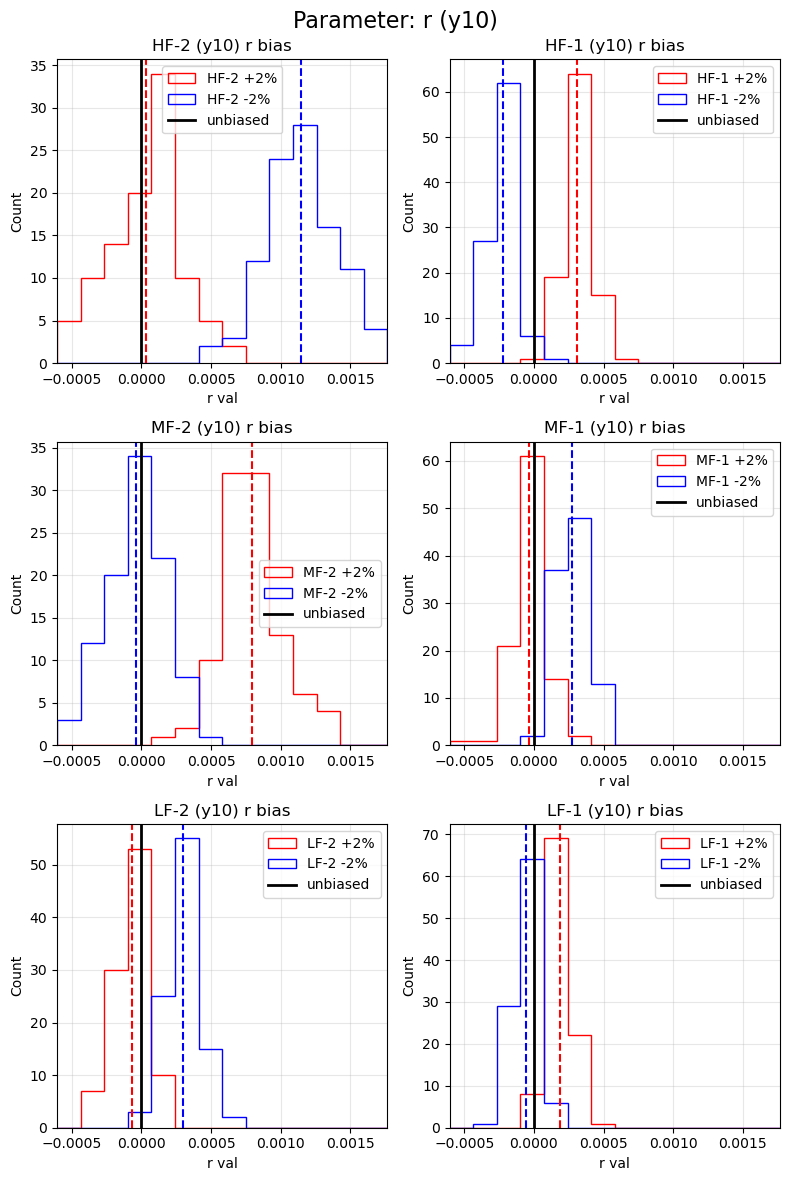

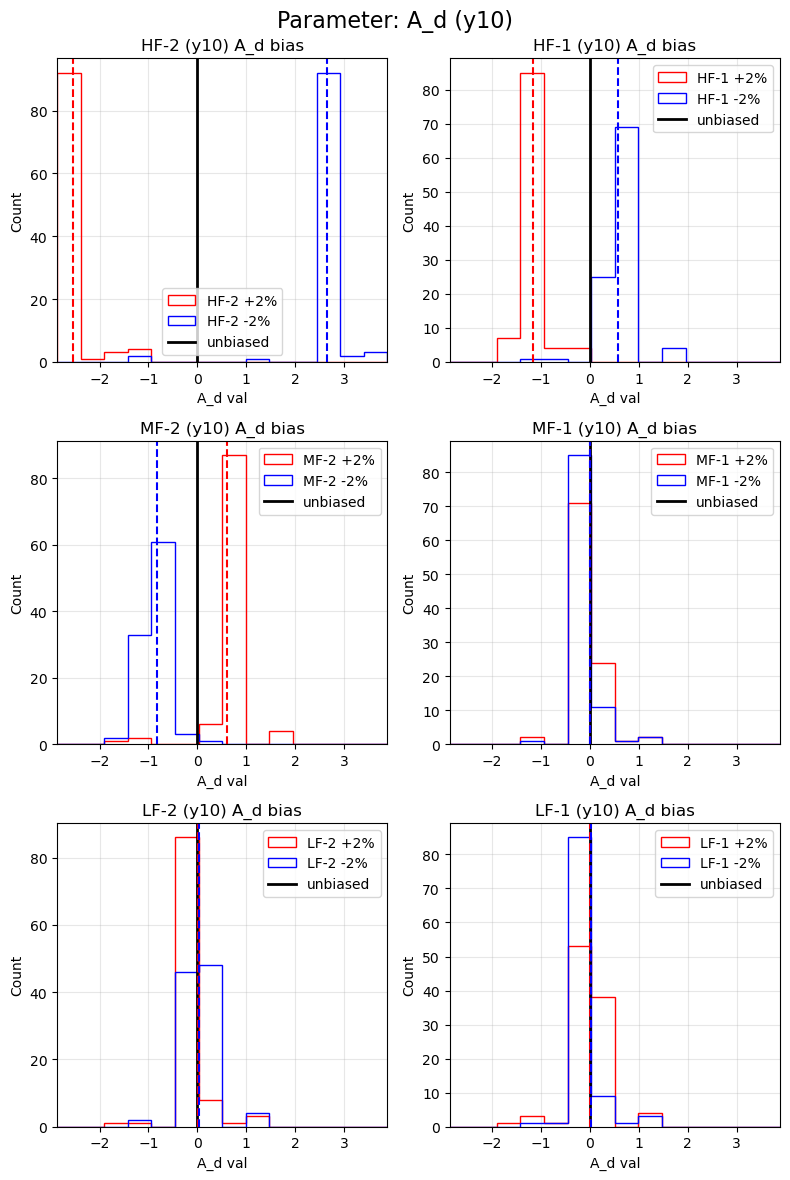

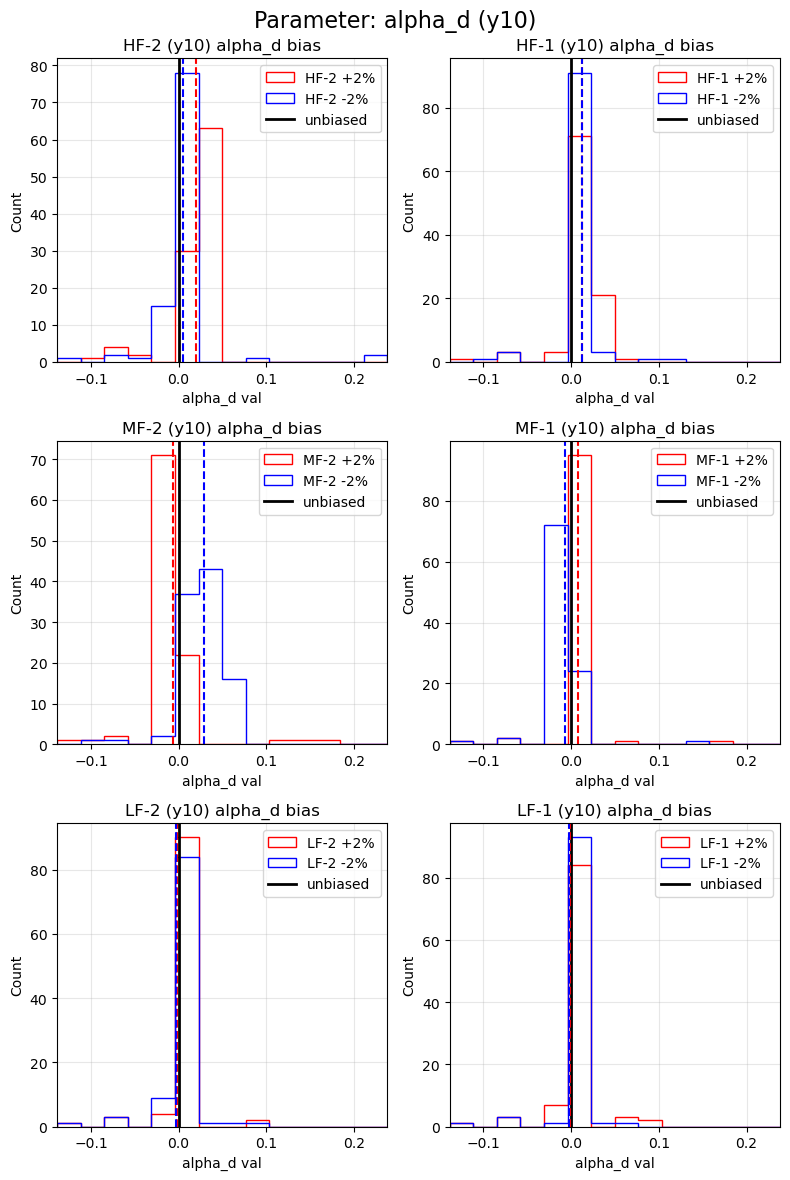

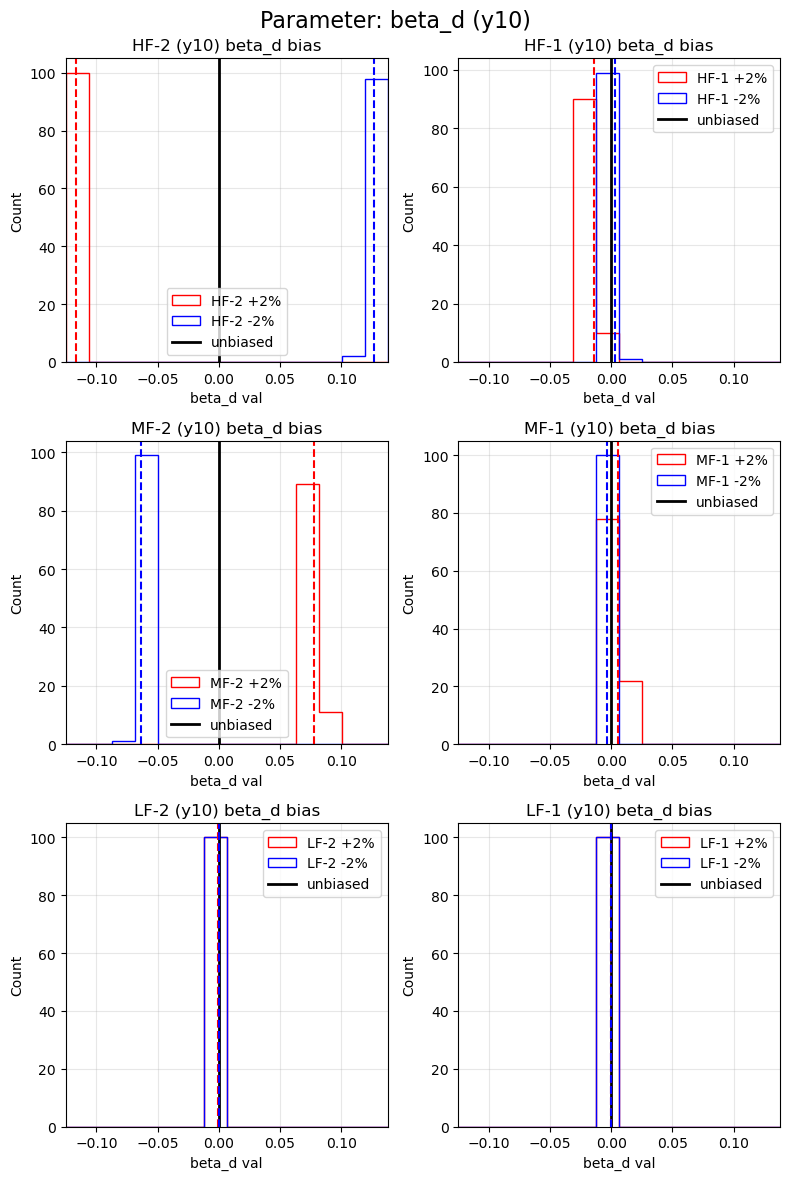

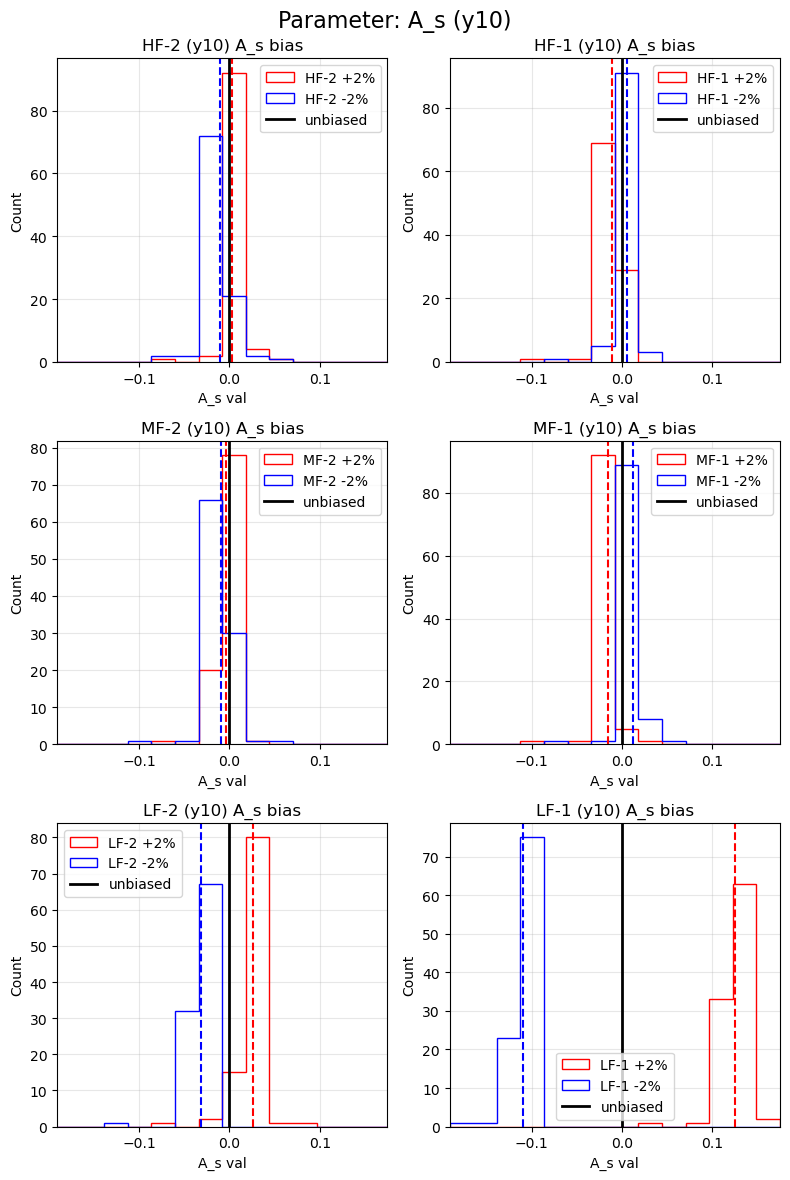

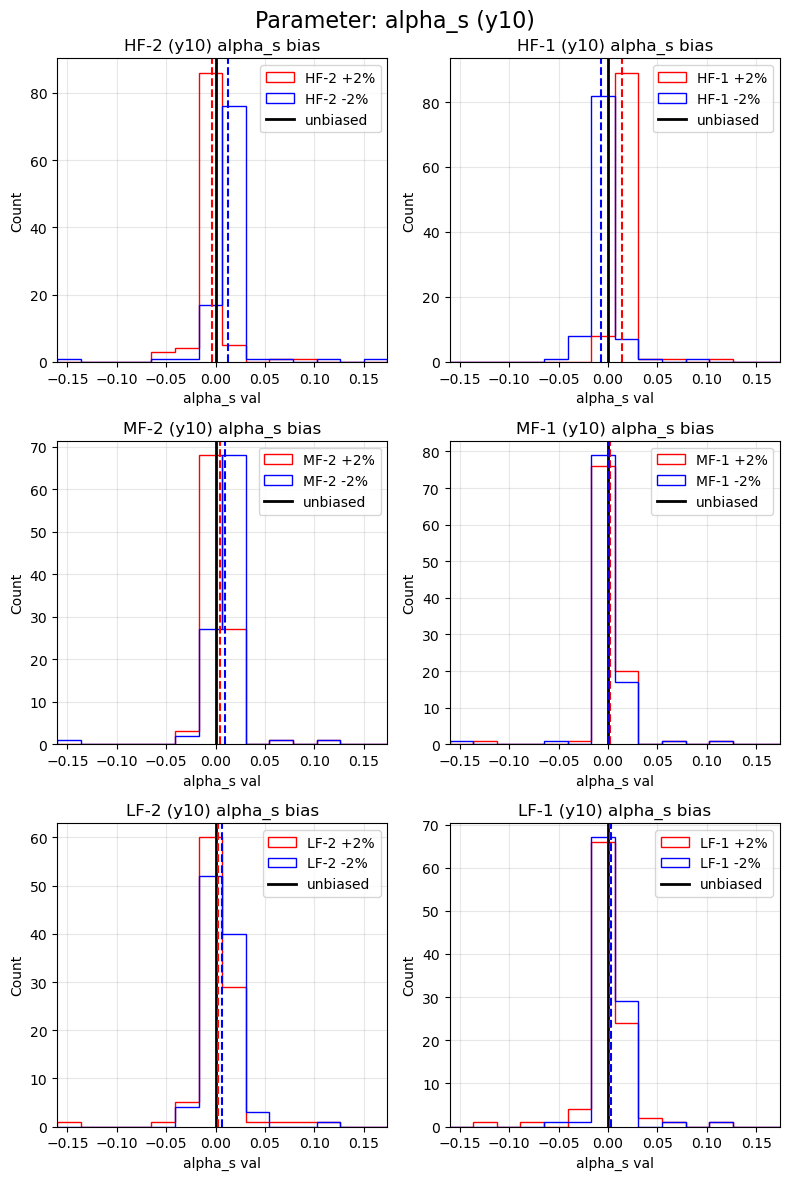

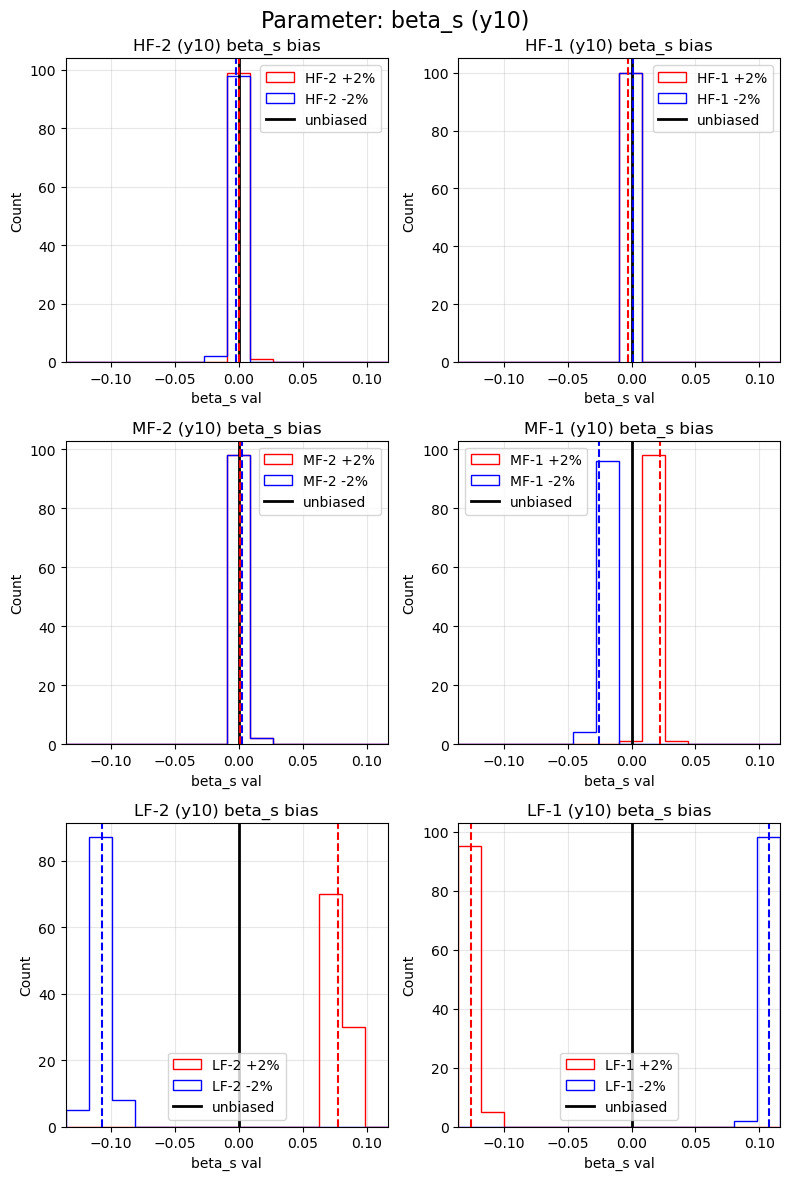

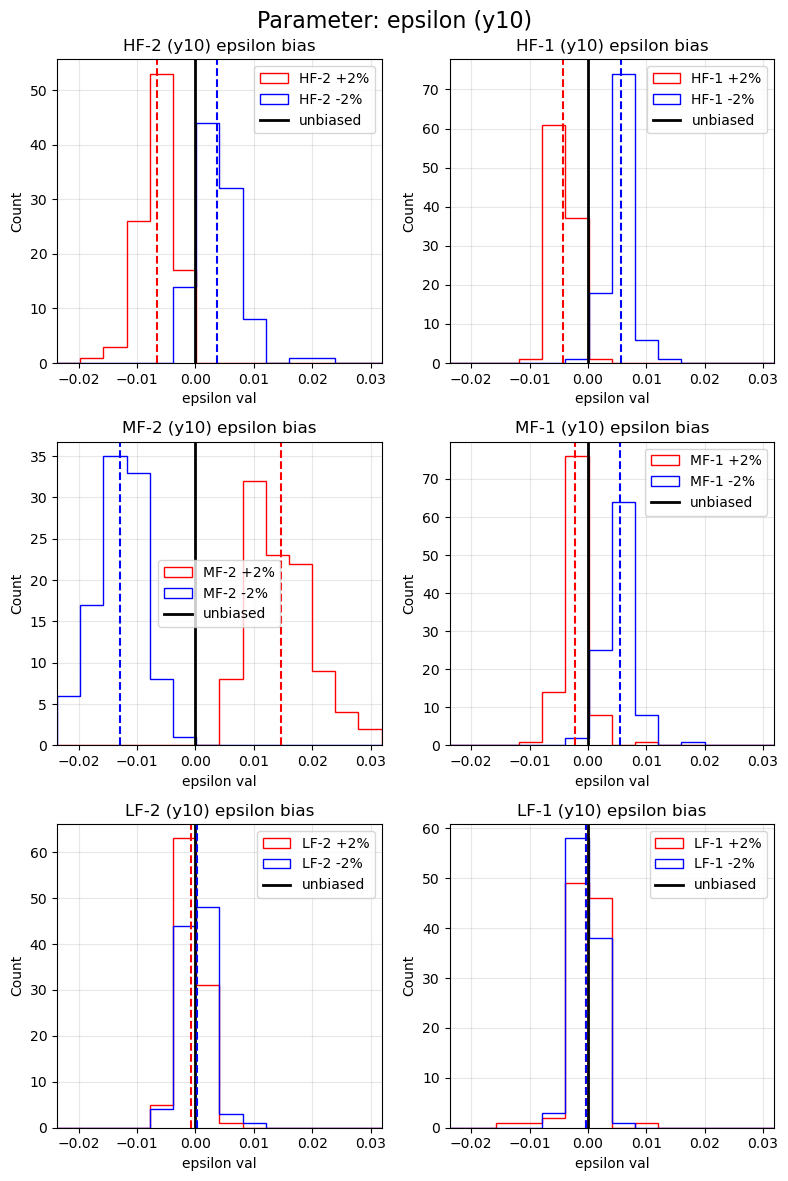

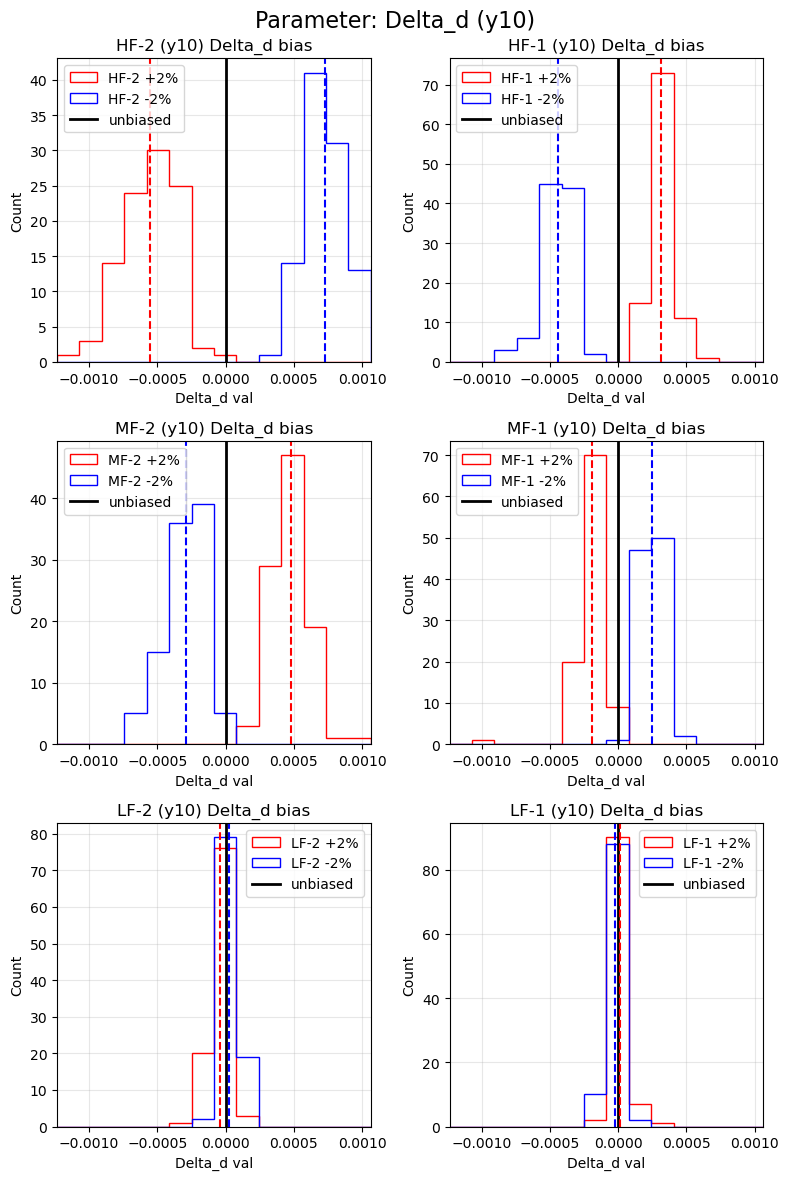

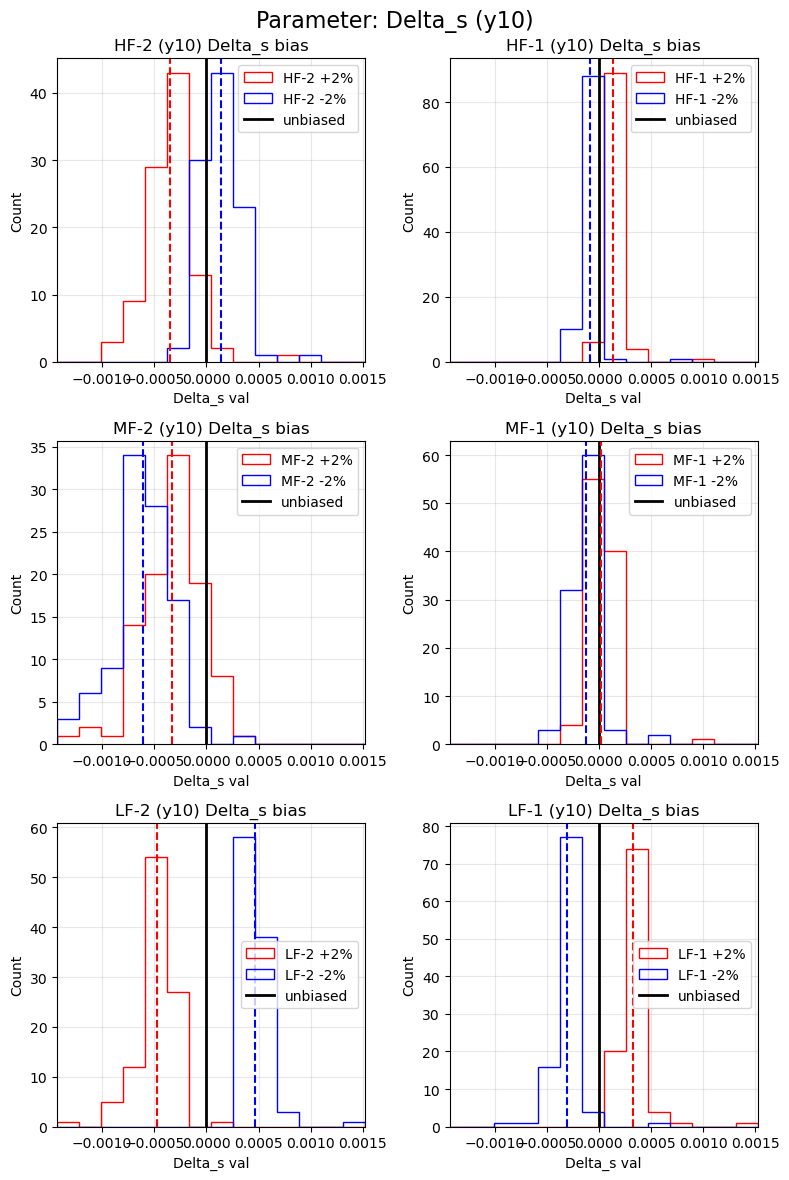

In [17]:
parameters = ['r', 'A_d', 'alpha_d', 'beta_d', 'A_s', 'alpha_s', 'beta_s', 'epsilon', 'Delta_d', 'Delta_s']

bands_data_y10 = []
for band in ['HF-2', 'HF-1', 'MF-2', 'MF-1', 'LF-2', 'LF-1']:
    band_clean = band.replace('-', '')
    pos_var = f"bias{band_clean}_2_y10"  
    neg_var = f"bias{band_clean}_neg2_y10" 
    bands_data_y10.append((bias_dict_y10[pos_var], bias_dict_y10[neg_var], band))

for param in parameters:
    all_param_data = []
    for pos_data, neg_data, _ in bands_data_y10:
        all_param_data.extend(pos_data[param])
        all_param_data.extend(neg_data[param])
    
    param_min = min(all_param_data)
    param_max = max(all_param_data)
    bin_edges = np.linspace(param_min, param_max, 15)
    
    fig, axes = plt.subplots(3, 2, figsize=(8, 12))
    axes = axes.flatten()
    
    for i, (pos_data, neg_data, band_name) in enumerate(bands_data_y10):
        ax = axes[i]
        
        ax.hist(pos_data[param], bins=bin_edges, color='red', label=f'{band_name} +2%', histtype='step')
        ax.hist(neg_data[param], bins=bin_edges, color='blue', label=f'{band_name} -2%', histtype='step')
        
        ax.axvline(0, color='black', linewidth=2, label='unbiased')
        ax.axvline(pos_data[param].mean(), color='red', linestyle='--')
        ax.axvline(neg_data[param].mean(), color='blue', linestyle='--')
        
        ax.set_xlabel(f'{param} val')
        ax.set_ylabel('Count')
        ax.set_title(f'{band_name} (y10) {param} bias')
        ax.set_xlim(param_min, param_max)
        ax.legend()
        ax.grid(alpha=0.3)
    
    plt.suptitle(f'Parameter: {param} (y10)', fontsize=16)
    plt.tight_layout()
    plt.show()